In [ ]:
from google.colab import files
uploaded = files.upload()

Saving covid.csv to covid.csv


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from numpy import mean
from numpy import std
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier



In [ ]:
df = pd.read_csv('covid.csv')
df


,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,9999-99-99,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,9999-99-99,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,9999-99-99,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,9999-99-99,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566597,01ff60,2,1,13-05-2020,03-05-2020,9999-99-99,97,2,58,97,1,2,2,2,2,2,2,2,2,2,2,3,97
566598,047cd1,1,1,07-04-2020,06-04-2020,9999-99-99,97,2,48,2,2,2,2,2,2,2,2,2,2,2,2,3,97
566599,1beb81,1,2,14-05-2020,01-05-2020,9999-99-99,2,1,49,2,2,2,2,2,2,2,2,1,2,2,99,3,2
566600,16fb02,1,1,31-05-2020,29-05-2020,9999-99-99,97,1,43,2,2,2,2,2,2,2,2,2,2,2,2,3,97


In [ ]:
df.columns

Index(['id', 'sex', 'patient_type', 'entry_date', 'date_symptoms', 'date_died',
       'intubed', 'pneumonia', 'age', 'pregnancy', 'diabetes', 'copd',
       'asthma', 'inmsupr', 'hypertension', 'other_disease', 'cardiovascular',
       'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
       'covid_res', 'icu'],
      dtype='object')

In [ ]:
df.dtypes

id                     object
sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
date_died              object
intubed                 int64
pneumonia               int64
age                     int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
dtype: object

In [ ]:
# df.replace(9999-99-99, np.nan)
# replacing 999 with null instead
df['date_died'].replace({'9999-99-99': None},inplace =True)

df.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu
0,16169f,2,1,04-05-2020,02-05-2020,None,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97
1,1009bf,2,1,19-03-2020,17-03-2020,None,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97
2,167386,1,2,06-04-2020,01-04-2020,None,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2
3,0b5948,2,2,17-04-2020,10-04-2020,None,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2


In [ ]:
# converting to date-time datatype
df['dd'] = pd.to_datetime(df['date_died'], infer_datetime_format=True)
df['ed'] = pd.to_datetime(df['entry_date'], infer_datetime_format=True)
df.head(5)

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,dd,ed
0,16169f,2,1,04-05-2020,02-05-2020,None,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,NaT,2020-04-05
1,1009bf,2,1,19-03-2020,17-03-2020,None,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,NaT,2020-03-19
2,167386,1,2,06-04-2020,01-04-2020,None,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,NaT,2020-06-04
3,0b5948,2,2,17-04-2020,10-04-2020,None,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,NaT,2020-04-17
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,2020-04-22,2020-04-13


In [ ]:
df.dtypes

id                             object
sex                             int64
patient_type                    int64
entry_date                     object
date_symptoms                  object
date_died                      object
intubed                         int64
pneumonia                       int64
age                             int64
pregnancy                       int64
diabetes                        int64
copd                            int64
asthma                          int64
inmsupr                         int64
hypertension                    int64
other_disease                   int64
cardiovascular                  int64
obesity                         int64
renal_chronic                   int64
tobacco                         int64
contact_other_covid             int64
covid_res                       int64
icu                             int64
dd                     datetime64[ns]
ed                     datetime64[ns]
dtype: object

## Visualization 

Text(0, 0.5, 'count')

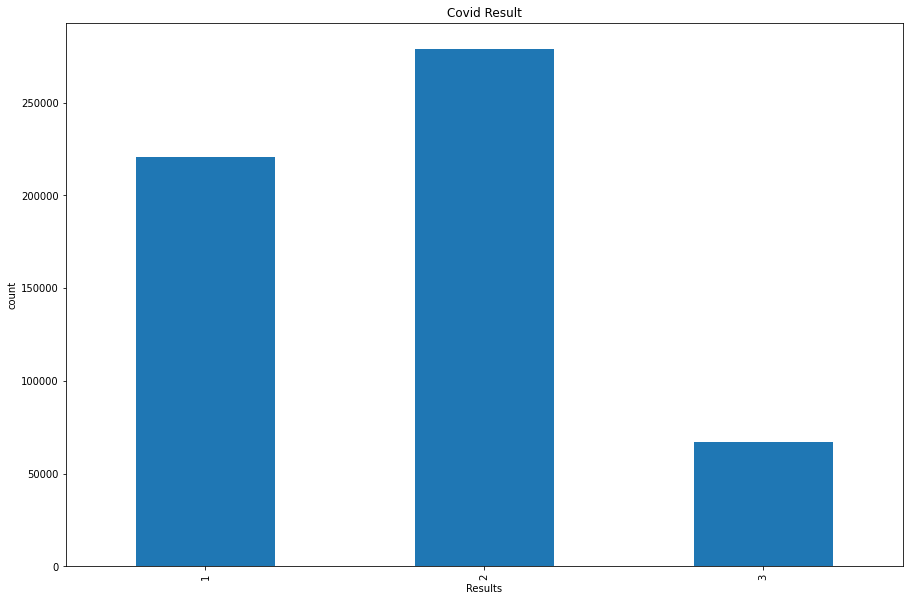

In [ ]:
# df['covid_res'].value_counts().sort_index().plot.bar(figsize =(15,10))
# plt.title('Covid Result')
# plt.xlabel('Results')
# plt.ylabel('count')

In [ ]:
#dff=df

In [ ]:
# dff['covid_res'].replace([1,2,3],['positive','negative','awaiting'],inplace=True)
# dff['covid_res'].value_counts().to_frame()

,covid_res
negative,279035
positive,220657
awaiting,66910


Text(0, 0.5, 'count')

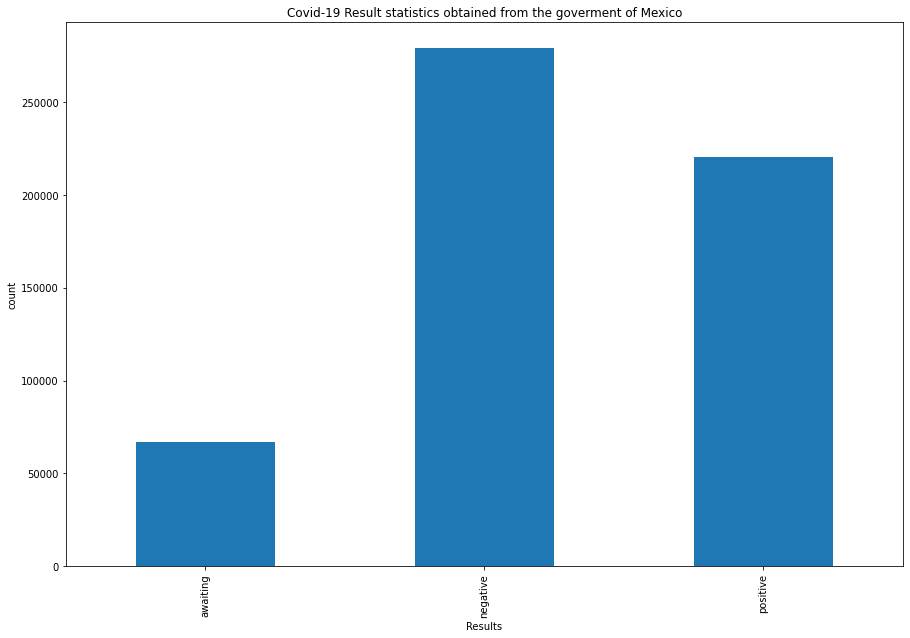

In [ ]:
# dff['covid_res'].value_counts().sort_index().plot.bar(figsize =(15,10))
# plt.title('Covid-19 Result statistics obtained from the goverment of Mexico')
# plt.xlabel('Results')
# plt.ylabel('count')

Text(0.5, 1.0, 'covid_res')

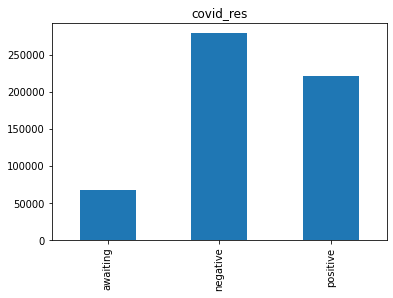

In [ ]:
# dff['covid_res'].value_counts().sort_index().plot.bar()
# plt.title('covid_res')

In [ ]:
# dff = dff.replace({'intubed' : { 97 : 3, 98 : 3, 99 : 3},
#                    'pneumonia' : { 97 : 3, 98 : 3, 99 : 3},
#                    'pregnancy' : { 97 : 3, 98 : 3, 99 : 3},
#                    'diabetes' : { 97 : 3, 98 : 3, 99 : 3},
#                    'copd' : { 97 : 3, 98 : 3, 99 : 3},
#                    'asthma' : { 97 : 3, 98 : 3, 99 : 3},
#                    'inmsupr' : { 97 : 3, 98 : 3, 99 : 3},
#                    'hypertension' : { 97 : 3, 98 : 3, 99 : 3},
#                    'other_disease' : { 97 : 3, 98 : 3, 99 : 3},
#                    'cardiovascular' : { 97 : 3, 98 : 3, 99 : 3},
#                    'obesity' : { 97 : 3, 98 : 3, 99 : 3},
#                    'renal_chronic' : { 97 : 3, 98 : 3, 99 : 3},
#                    'tobacco' : { 97 : 3, 98 : 3, 99 : 3},
#                    'contact_other_covid' : { 97 : 3, 98 : 3, 99 : 3},
#                    'covid_res' : { 97 : 3, 98 : 3, 99 : 3},
#                    'icu' : { 97 : 3, 98 : 3, 99 : 3},
                  
#                    })

In [ ]:
# selected_features=['sex', 'patient_type', 'intubed', 'pneumonia', 'age', 'pregnancy',
#        'diabetes', 'copd', 'asthma', 'inmsupr', 'hypertension',
#        'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
#        'tobacco', 'contact_other_covid', 'icu']
# list(enumerate(selected_features))

[(0, 'sex'),
 (1, 'patient_type'),
 (2, 'intubed'),
 (3, 'pneumonia'),
 (4, 'age'),
 (5, 'pregnancy'),
 (6, 'diabetes'),
 (7, 'copd'),
 (8, 'asthma'),
 (9, 'inmsupr'),
 (10, 'hypertension'),
 (11, 'other_disease'),
 (12, 'cardiovascular'),
 (13, 'obesity'),
 (14, 'renal_chronic'),
 (15, 'tobacco'),
 (16, 'contact_other_covid'),
 (17, 'icu')]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

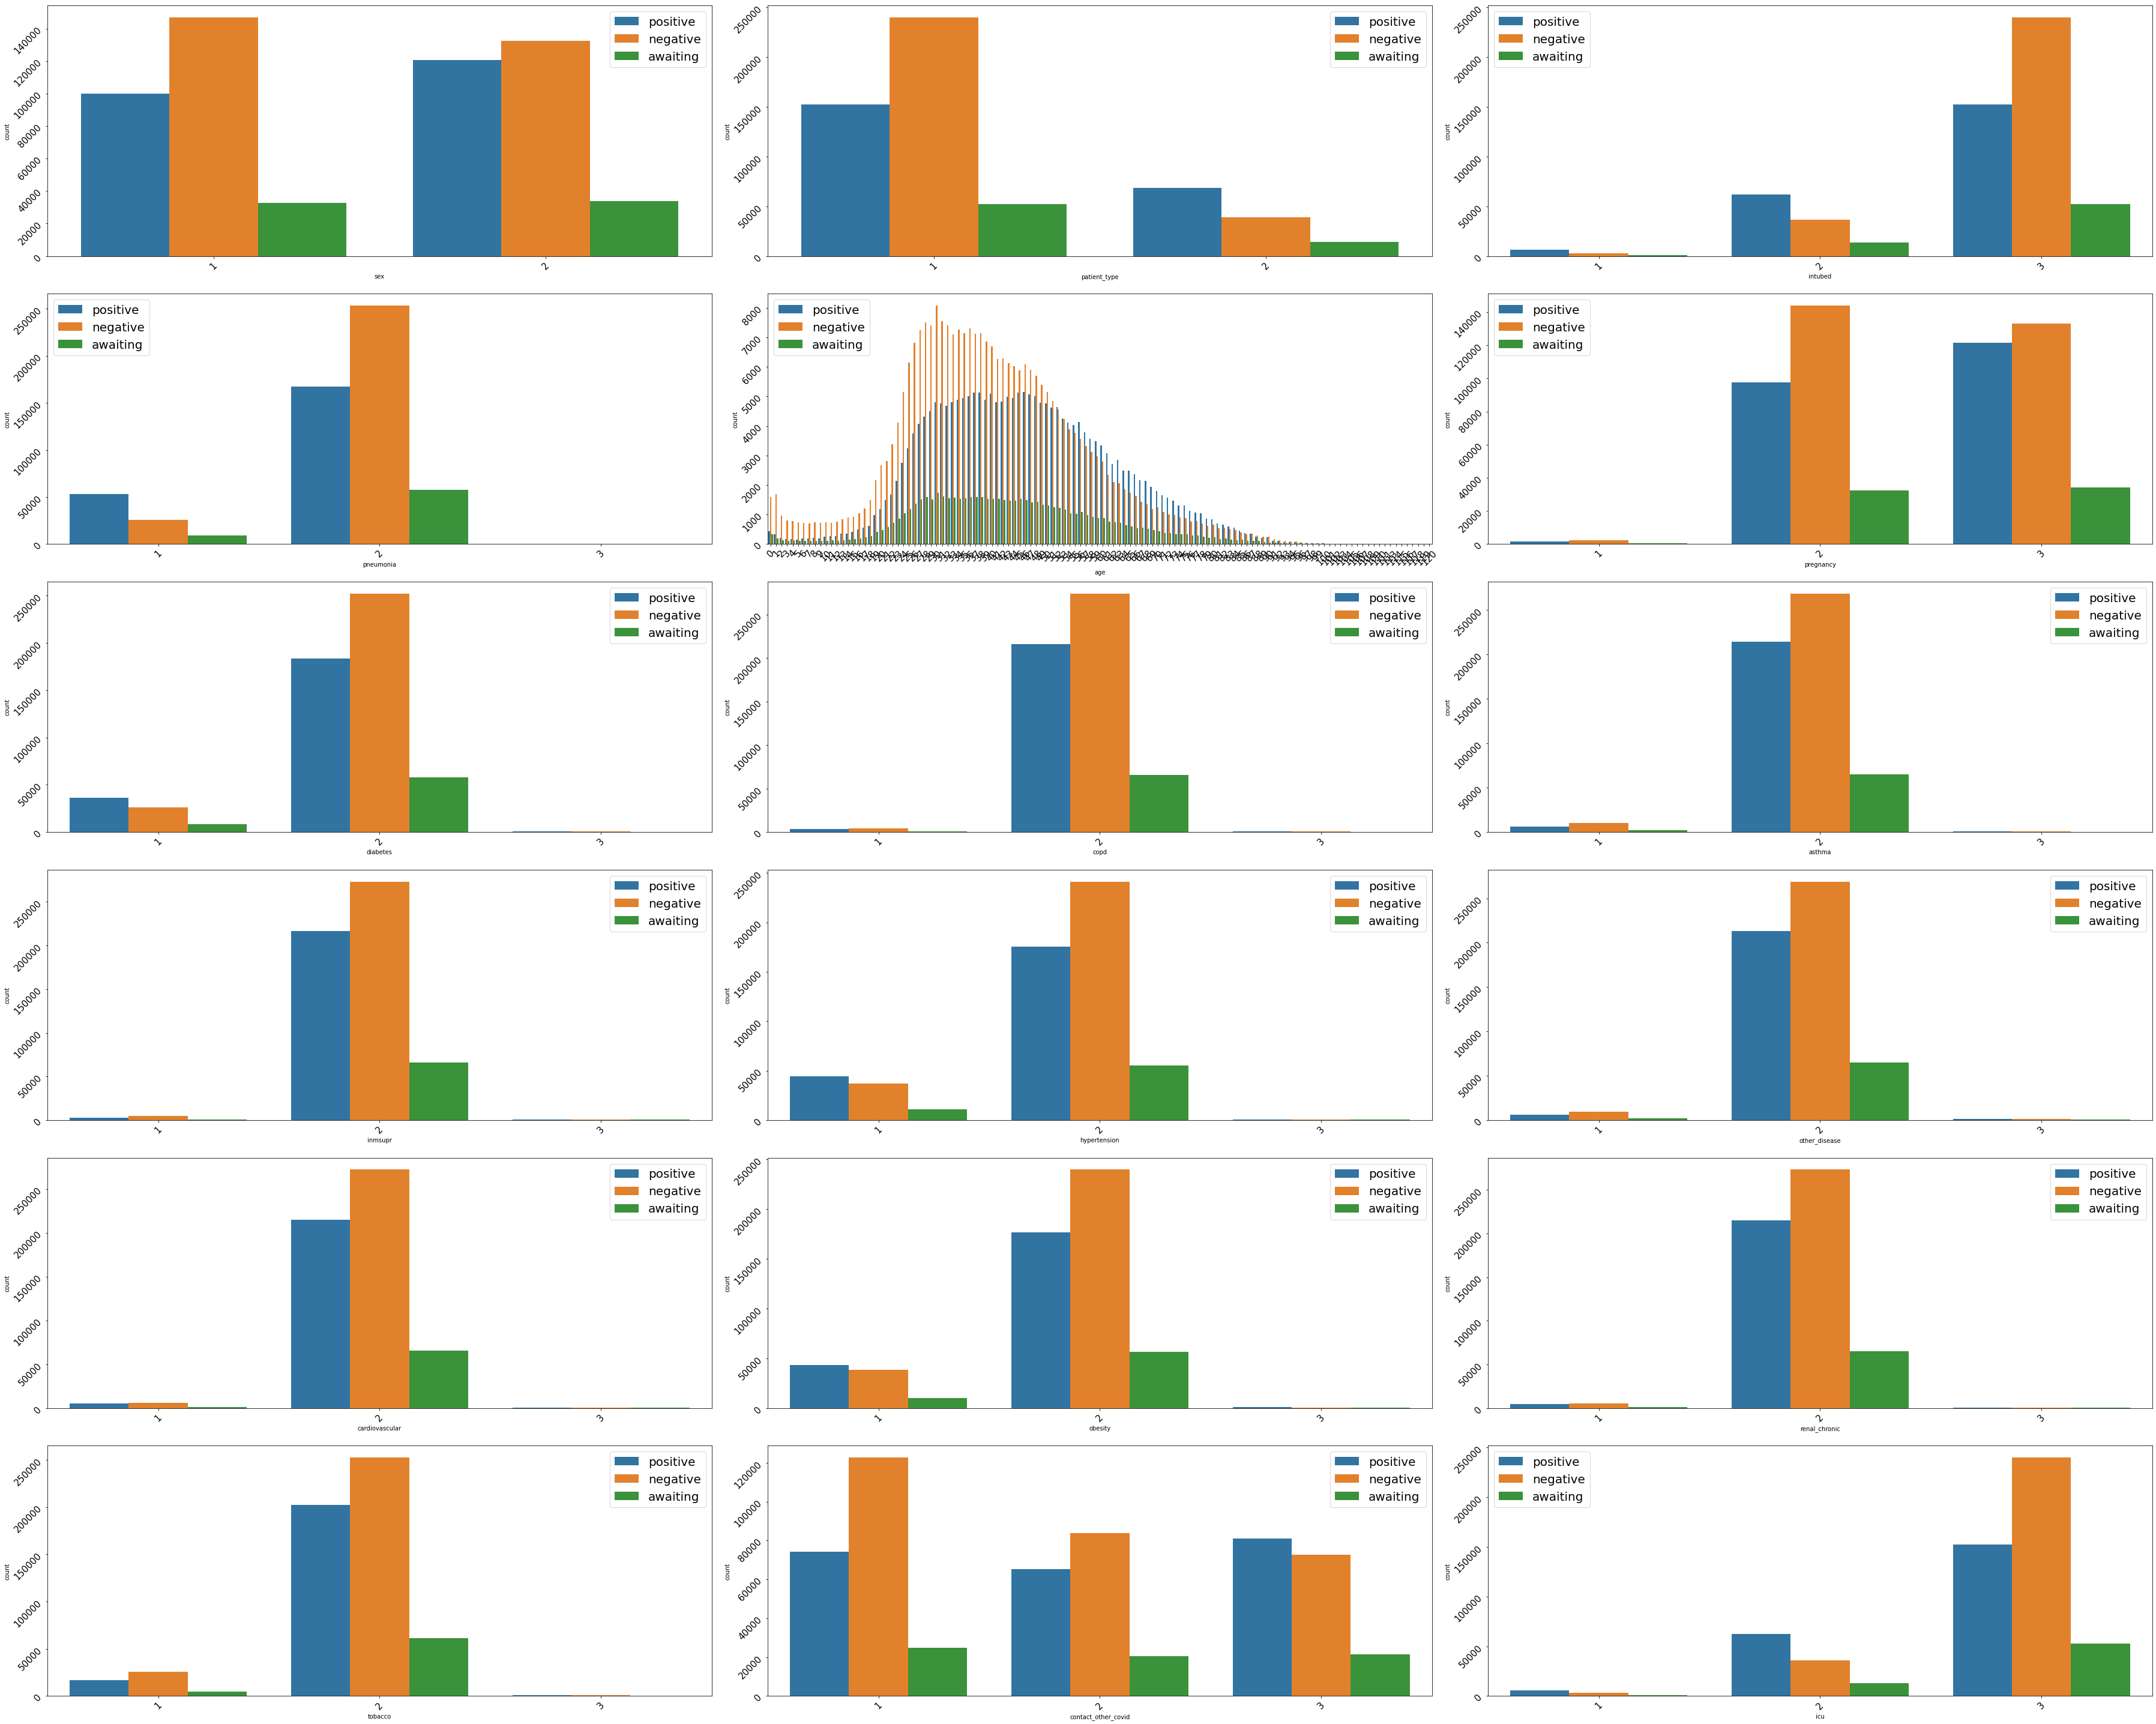

In [ ]:
# plt.figure(figsize=(50,40))
# for i in enumerate(selected_features):
#     plt.subplot(6,3,i[0]+1)
#     sns.countplot(i[1],hue='covid_res',data=dff)
#     plt.xticks(rotation=45,size=15)
#     plt.yticks(rotation=45,size=15)
#     plt.tight_layout() 
#     plt.legend(prop={'size': 20})

In [ ]:
df['Days_to_die'] = (df['dd'] - df['ed']).dt.days
df.head(5)
df.dtypes

id                             object
sex                             int64
patient_type                    int64
entry_date                     object
date_symptoms                  object
date_died                      object
intubed                         int64
pneumonia                       int64
age                             int64
pregnancy                       int64
diabetes                        int64
copd                            int64
asthma                          int64
inmsupr                         int64
hypertension                    int64
other_disease                   int64
cardiovascular                  int64
obesity                         int64
renal_chronic                   int64
tobacco                         int64
contact_other_covid             int64
covid_res                       int64
icu                             int64
dd                     datetime64[ns]
ed                     datetime64[ns]
Days_to_die                   float64
dtype: objec

In [ ]:
# 1- positive 2- negative 3- pending
df['covid_res'].value_counts()

2    279035
1    220657
3     66910
Name: covid_res, dtype: int64

In [ ]:
# index_names = df[df['covid_res'] == 3].index 
# df_clas = df.drop(index_names, inplace = True) 
# df['covid_res'].value_counts()
# df['impos'] = df.apply(lambda x: 1 if (x['covid_res'] == 3 and x['dd'].notnull()) else 0, axis=1)

# locating datapoints where the patient dies while awaiting pending covid results
df.loc[(df['dd'].notnull()) & (df['covid_res'] == 3)]

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,dd,ed,Days_to_die
499693,02554c,2,2,25-05-2020,25-05-2020,11-06-2020,2,1,86,97,2,2,2,2,1,2,2,2,2,2,99,3,2,2020-06-11,2020-05-25,17.0
499694,016f8a,1,2,27-05-2020,27-05-2020,11-06-2020,2,2,55,2,1,2,2,2,1,2,1,2,2,2,99,3,2,2020-06-11,2020-05-27,15.0
499707,046f4c,2,1,18-06-2020,11-06-2020,26-06-2020,97,2,51,97,2,2,1,2,2,2,2,2,2,2,99,3,97,2020-06-26,2020-06-18,8.0
499718,0fa79f,2,2,24-06-2020,18-06-2020,28-06-2020,2,1,61,97,2,2,2,2,2,2,2,2,2,2,99,3,2,2020-06-28,2020-06-24,4.0
499720,1bb598,2,2,26-04-2020,26-04-2020,15-05-2020,2,1,75,97,1,2,2,2,1,2,1,2,2,2,99,3,2,2020-05-15,2020-04-26,19.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566548,17967b,1,2,03-05-2020,30-04-2020,13-05-2020,2,1,58,2,2,2,2,2,2,2,2,2,2,2,99,3,2,2020-05-13,2020-03-05,69.0
566552,146818,2,2,12-06-2020,02-06-2020,19-06-2020,1,1,59,97,1,2,2,2,1,2,2,2,2,2,2,3,1,2020-06-19,2020-12-06,-170.0
566553,09ec74,2,2,04-06-2020,03-06-2020,05-06-2020,2,2,73,97,1,2,2,2,1,2,2,2,2,2,99,3,2,2020-06-05,2020-04-06,60.0
566578,028be6,1,2,05-06-2020,23-05-2020,14-06-2020,1,1,34,2,2,2,2,2,2,2,2,2,2,2,1,3,2,2020-06-14,2020-05-06,39.0


In [ ]:
# removing such datapoints
index_names = df[df['covid_res'] == 3].index 
df.drop(index_names, inplace = True) 
df['covid_res'].value_counts()

2    279035
1    220657
Name: covid_res, dtype: int64

In [ ]:
# creating the classfication target feature
df['survival'] = df.apply(lambda x: 0 if pd.notnull(x['dd']) else 1, axis= 1)
df['survival'].value_counts()
# df.head(5)

1    465571
0     34121
Name: survival, dtype: int64

In [ ]:
# creating the classification dataframe
df_class = df.drop(columns=['Days_to_die', 'dd', 'date_died'])
df_class.head(10)

,id,sex,patient_type,entry_date,date_symptoms,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,ed,survival
0,16169f,2,1,04-05-2020,02-05-2020,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,2020-04-05,1
1,1009bf,2,1,19-03-2020,17-03-2020,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,2020-03-19,1
2,167386,1,2,06-04-2020,01-04-2020,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,2020-06-04,1
3,0b5948,2,2,17-04-2020,10-04-2020,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,2020-04-17,1
4,0d01b5,1,2,13-04-2020,13-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,2020-04-13,0
5,1beec8,2,2,16-04-2020,16-04-2020,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1,2020-04-16,0
6,1.75E+56,2,2,22-04-2020,13-04-2020,2,2,63,97,2,2,2,2,1,2,2,2,2,2,99,1,2,2020-04-22,1
7,0ce1f5,1,1,21-05-2020,18-05-2020,97,2,56,2,2,2,2,2,1,2,2,2,1,1,1,1,97,2020-05-21,1
8,12b57a,1,1,22-04-2020,18-04-2020,97,2,41,2,2,2,2,2,2,2,2,2,2,2,99,1,97,2020-04-22,1
9,006b91,1,2,23-04-2020,18-04-2020,1,1,39,2,2,2,2,2,2,2,2,1,2,2,99,1,2,2020-04-23,1


# Exploration of the Classification dataset 

In [ ]:
df_class.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,survival
count,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000,499692.000000
mean,1.506508,1.215225,76.559130,1.844606,42.545942,50.367699,2.190491,2.261241,2.244587,2.303149,2.123284,2.390513,2.267055,2.118455,2.263516,2.217392,31.437151,1.558414,76.559513,0.931716
std,0.499958,0.410978,39.062165,0.583531,16.640391,47.502133,5.509456,5.159212,5.154416,5.529664,5.254503,6.350171,5.270922,5.221276,5.212779,5.400077,45.027669,0.496577,39.061674,0.252233
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,97.000000,2.000000,31.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,97.000000,1.000000
50%,2.000000,1.000000,97.000000,2.000000,41.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,97.000000,1.000000
75%,2.000000,1.000000,97.000000,2.000000,53.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,2.000000,97.000000,1.000000
max,2.000000,2.000000,99.000000,99.000000,120.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,2.000000,99.000000,1.000000


In [ ]:
df_class

,id,sex,patient_type,entry_date,date_symptoms,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,ed,survival
0,16169f,2,1,04-05-2020,02-05-2020,97,2,27,97,2,2,2,2,2,2,2,2,2,2,2,1,97,2020-04-05,1
1,1009bf,2,1,19-03-2020,17-03-2020,97,2,24,97,2,2,2,2,2,2,2,2,2,2,99,1,97,2020-03-19,1
2,167386,1,2,06-04-2020,01-04-2020,2,2,54,2,2,2,2,2,2,2,2,1,2,2,99,1,2,2020-06-04,1
3,0b5948,2,2,17-04-2020,10-04-2020,2,1,30,97,2,2,2,2,2,2,2,2,2,2,99,1,2,2020-04-17,1
4,0d01b5,1,2,13-04-2020,13-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,2020-04-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,1342ee,2,1,26-03-2020,20-03-2020,97,1,77,97,2,2,2,2,2,1,2,2,2,1,2,2,97,2020-03-26,1
499688,0186c8,2,2,28-03-2020,23-03-2020,1,1,63,97,2,2,2,2,1,2,2,1,2,1,2,2,2,2020-03-28,1
499689,130373,1,1,16-03-2020,13-03-2020,97,2,25,2,2,2,2,2,2,2,2,2,2,2,2,2,97,2020-03-16,1
499690,10b265,1,1,27-03-2020,25-03-2020,97,2,45,2,2,2,2,2,1,2,2,2,2,2,1,2,97,2020-03-27,1


In [ ]:
df_class.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 499692 entries, 0 to 499691
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   499692 non-null  object        
 1   sex                  499692 non-null  int64         
 2   patient_type         499692 non-null  int64         
 3   entry_date           499692 non-null  object        
 4   date_symptoms        499692 non-null  object        
 5   intubed              499692 non-null  int64         
 6   pneumonia            499692 non-null  int64         
 7   age                  499692 non-null  int64         
 8   pregnancy            499692 non-null  int64         
 9   diabetes             499692 non-null  int64         
 10  copd                 499692 non-null  int64         
 11  asthma               499692 non-null  int64         
 12  inmsupr              499692 non-null  int64         
 13  hypertension  

In [ ]:
columns = ['intubed', 'pneumonia', 'pregnancy']
for column in columns:
    print(df_class['icu'].value_counts())

97    392146
2      98414
1       9009
99       123
Name: icu, dtype: int64
97    392146
2      98414
1       9009
99       123
Name: icu, dtype: int64
97    392146
2      98414
1       9009
99       123
Name: icu, dtype: int64


In [ ]:
#replacing the 97,98 & 99 values which represent null values with 3 for the categorical features
df_class = df_class.replace({'intubed' : { 97 : 3, 98 : 3, 99 : 3},
                   'pneumonia' : { 97 : 3, 98 : 3, 99 : 3},
                   'pregnancy' : { 97 : 3, 98 : 3, 99 : 3},
                   'diabetes' : { 97 : 3, 98 : 3, 99 : 3},
                   'copd' : { 97 : 3, 98 : 3, 99 : 3},
                   'asthma' : { 97 : 3, 98 : 3, 99 : 3},
                   'inmsupr' : { 97 : 3, 98 : 3, 99 : 3},
                   'hypertension' : { 97 : 3, 98 : 3, 99 : 3},
                   'other_disease' : { 97 : 3, 98 : 3, 99 : 3},
                   'cardiovascular' : { 97 : 3, 98 : 3, 99 : 3},
                   'obesity' : { 97 : 3, 98 : 3, 99 : 3},
                   'renal_chronic' : { 97 : 3, 98 : 3, 99 : 3},
                   'tobacco' : { 97 : 3, 98 : 3, 99 : 3},
                   'contact_other_covid' : { 97 : 3, 98 : 3, 99 : 3},
                   'covid_res' : { 97 : 3, 98 : 3, 99 : 3},
                   'icu' : { 97 : 3, 98 : 3, 99 : 3},
                  
                   })

In [ ]:
columns = ['intubed', 'pneumonia', 'pregnancy']
for column in columns:
    print(df_class[column].value_counts())

3    392268
2     98321
1      9103
Name: intubed, dtype: int64
2    420965
1     78716
3        11
Name: pneumonia, dtype: int64
3    254434
2    241644
1      3614
Name: pregnancy, dtype: int64


In [ ]:
# df.loc[df['age'] == 120]
df_class["age_bin"] = pd.cut(df_class['age'], bins=12)
df_class["age_bin"].value_counts()

(30.0, 40.0]      120831
(40.0, 50.0]      108229
(20.0, 30.0]       91388
(50.0, 60.0]       77040
(60.0, 70.0]       40945
(70.0, 80.0]       20613
(10.0, 20.0]       18230
(-0.12, 10.0]      12689
(80.0, 90.0]        8305
(90.0, 100.0]       1350
(100.0, 110.0]        56
(110.0, 120.0]        16
Name: age_bin, dtype: int64

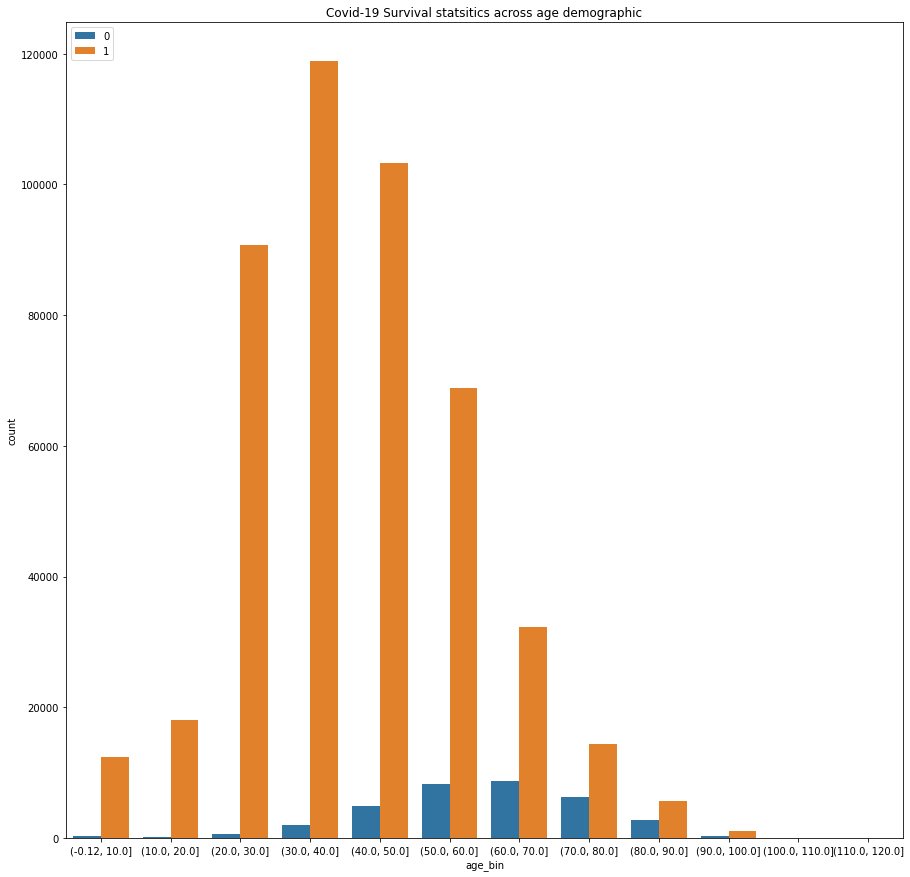

In [ ]:
#relationship between survival and the age demographic
# plt.figure(figsize=(15,15))
# ax = sns.countplot(x="age_bin", hue='survival', data=df_class)
# plt.title('Covid-19 Survival statsitics across age demographic')
# plt.legend()

In [ ]:
#df_class['sex'].replace([1,2],['Female','Male'],inplace=True)
#df_class['sex'].value_counts().to_frame()

,sex
Male,253098
Female,246594


Text(0.5, 1.0, 'Covid-19 Survival statsitics across by sex')

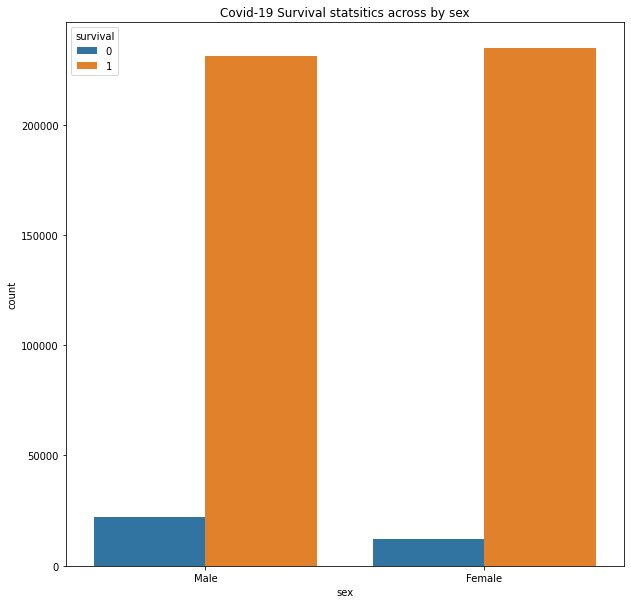

In [ ]:
#plt.figure(figsize=(10,10))
#ax1 = sns.countplot(x="sex", hue='survival', data=df_class)
#plt.title('Covid-19 Survival statsitics across by sex')


In [ ]:
#df_class['asthma'].replace([1,2,3],['Positive','Negative','NA'],inplace=True)
#df_class['asthma'].value_counts().to_frame()

,asthma
Negative,482036
Positive,16214
NA,1442


Text(0.5, 1.0, 'Covid-19 Survival statsitics across patients diagnosed with asthma')

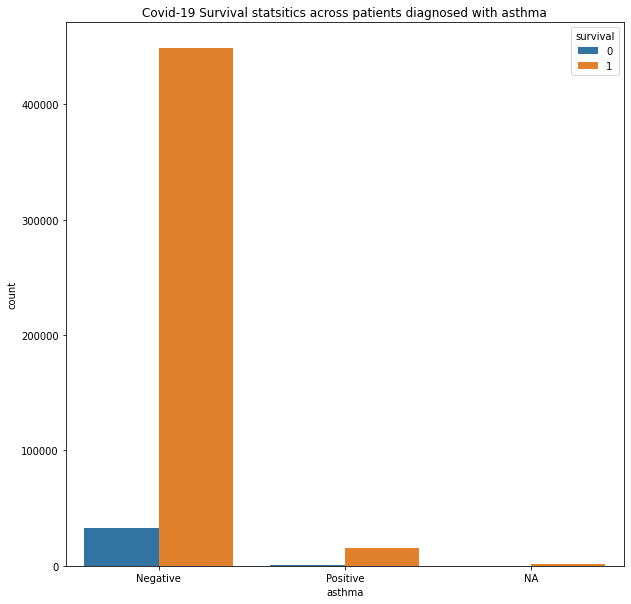

In [ ]:
#plt.figure(figsize=(10,10))
#ax2 = sns.countplot(x='asthma', hue='survival', data=df_class)
#plt.title('Covid-19 Survival statsitics across patients diagnosed with asthma')


In [ ]:
#df_class['patient_type'].replace([1,2],['Outpatient','Inpatient'],inplace=True)
#df_class['patient_type'].value_counts().to_frame()

,patient_type
Outpatient,392146
Inpatient,107546


Text(0.5, 1.0, 'Covid-19 Survival statsitics according to patient type')

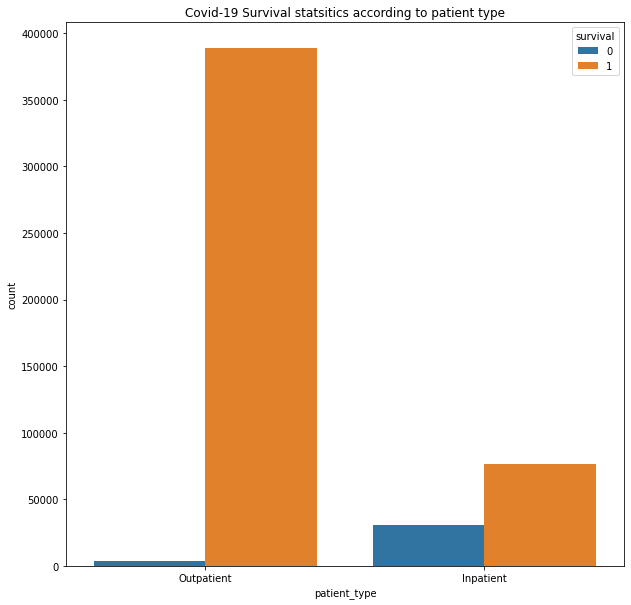

In [ ]:
# plt.figure(figsize=(10,10))
# ax3 = sns.countplot(x="patient_type", hue='survival', data=df_class)
# plt.title('Covid-19 Survival statsitics according to patient type')


In [ ]:
# df_class['pneumonia'].replace([1,2, 3],['Positive', 'Negative', 'NA'],inplace=True)
# df_class['pneumonia'].value_counts().to_frame()

,pneumonia
Negative,420965
Positive,78716
NA,11


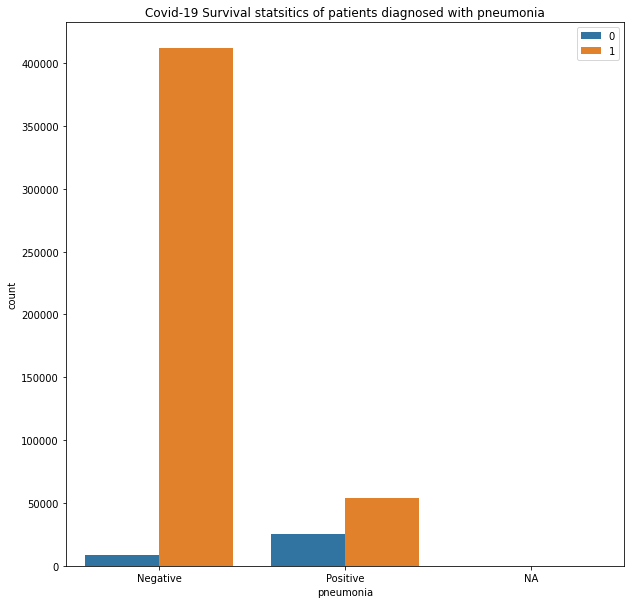

In [ ]:
# plt.figure(figsize=(10,10))
# ax4 = sns.countplot(x='pneumonia', hue='survival', data=df_class)
# plt.title('Covid-19 Survival statsitics of patients diagnosed with pneumonia')
# plt.legend()

### Label encoding

In [ ]:
# #LabelEncoding age_bin
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

# #refer to value counts above for label assignment
df_class['age_bin'] = labelencoder.fit_transform(df_class['age_bin'])
df_class["age_bin"].value_counts()

3     120831
4     108229
2      91388
5      77040
6      40945
7      20613
1      18230
0      12689
8       8305
9       1350
10        56
11        16
Name: age_bin, dtype: int64

In [ ]:
df_class.drop(["ed", 'id', 'age'], axis=1, inplace=True)

In [ ]:
df_class.dtypes

sex                     int64
patient_type            int64
entry_date             object
date_symptoms          object
intubed                 int64
pneumonia               int64
pregnancy               int64
diabetes                int64
copd                    int64
asthma                  int64
inmsupr                 int64
hypertension            int64
other_disease           int64
cardiovascular          int64
obesity                 int64
renal_chronic           int64
tobacco                 int64
contact_other_covid     int64
covid_res               int64
icu                     int64
survival                int64
age_bin                 int64
dtype: object

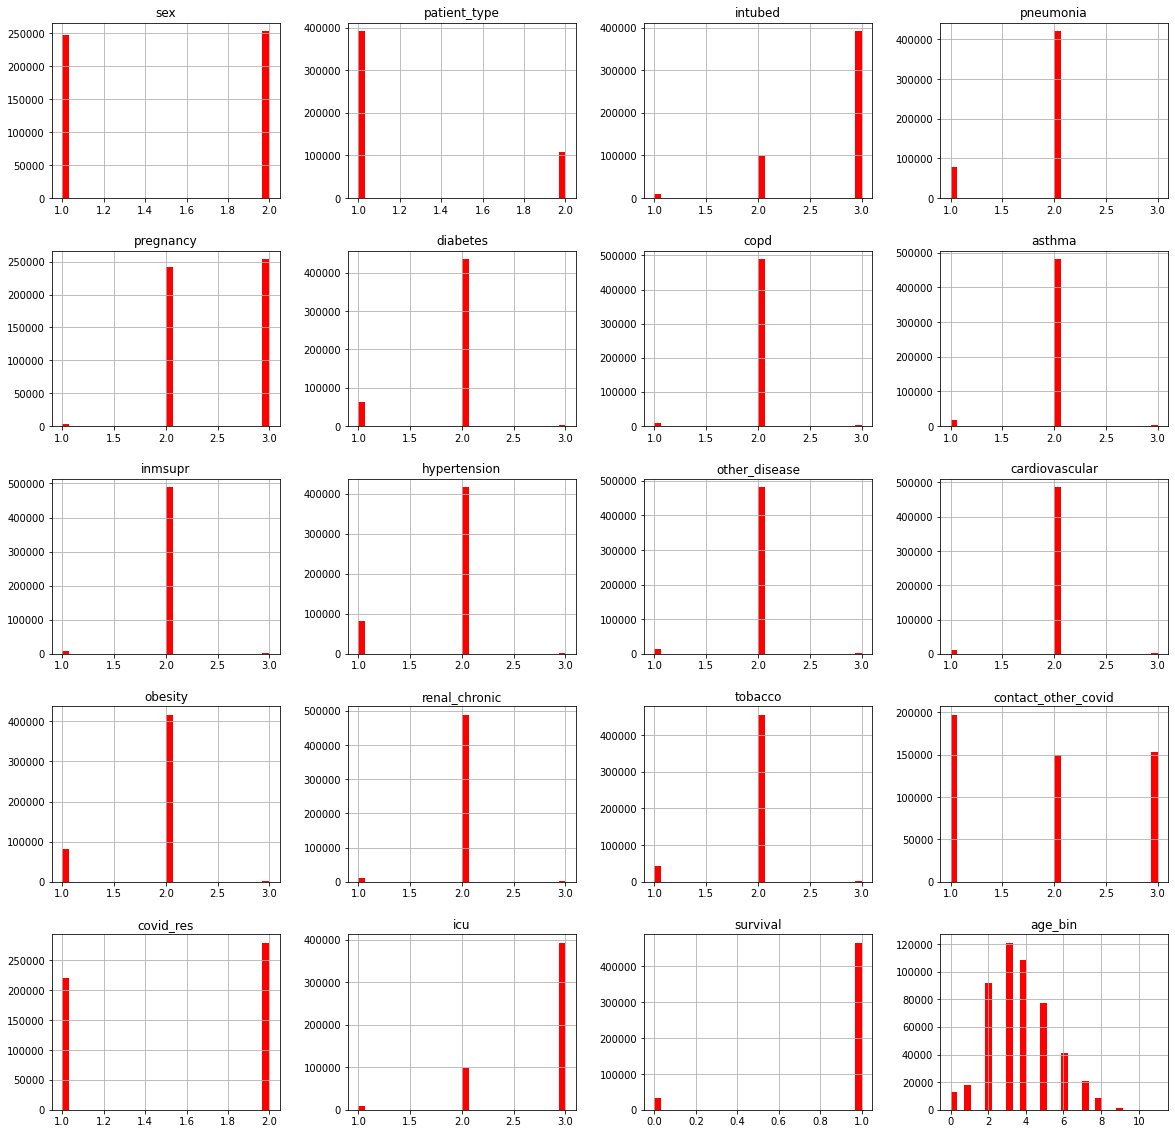

In [ ]:
df_class.hist(bins = 30, figsize =(20,20), color = 'r' )
plt.show()

## Encoding entry date and date symptom was discovered

In [ ]:
#convert to datetime format
df_class['entry_date'] = pd.to_datetime(df_class['entry_date'], infer_datetime_format=True)
df_class['date_symptoms'] = pd.to_datetime(df_class['date_symptoms'], infer_datetime_format=True)

In [ ]:
#Encoding the entry_date 
df_class['entry_date_year'] = df_class['entry_date'].dt.year
df_class['entry_date_month'] = df_class['entry_date'].dt.month
df_class['entry_date_week'] = df_class['entry_date'].dt.week
df_class['entry_date_day'] = df_class['entry_date'].dt.day
df_class['entry_date_dayofweek'] = df_class['entry_date'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
#encoding the date_symptoms
df_class['date_symptoms_year'] = df_class['date_symptoms'].dt.year
df_class['date_symptoms_month'] = df_class['date_symptoms'].dt.month
df_class['date_symptoms_week'] = df_class['date_symptoms'].dt.week
df_class['date_symptoms_day'] = df_class['date_symptoms'].dt.day
df_class['date_symptoms_dayofweek'] = df_class['date_symptoms'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
df_class

,sex,patient_type,entry_date,date_symptoms,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,survival,age_bin,entry_date_year,entry_date_month,entry_date_week,entry_date_day,entry_date_dayofweek,date_symptoms_year,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek
0,2,1,2020-04-05,2020-02-05,3,2,3,2,2,2,2,2,2,2,2,2,2,2,1,3,1,2,2020,4,14,5,6,2020,2,6,5,2
1,2,1,2020-03-19,2020-03-17,3,2,3,2,2,2,2,2,2,2,2,2,2,3,1,3,1,2,2020,3,12,19,3,2020,3,12,17,1
2,1,2,2020-06-04,2020-01-04,2,2,2,2,2,2,2,2,2,2,1,2,2,3,1,2,1,5,2020,6,23,4,3,2020,1,1,4,5
3,2,2,2020-04-17,2020-10-04,2,1,3,2,2,2,2,2,2,2,2,2,2,3,1,2,1,2,2020,4,16,17,4,2020,10,40,4,6
4,1,2,2020-04-13,2020-04-13,2,2,2,1,2,2,2,1,2,1,2,2,2,3,1,2,0,5,2020,4,16,13,0,2020,4,16,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,2,1,2020-03-26,2020-03-20,3,1,3,2,2,2,2,2,1,2,2,2,1,2,2,3,1,7,2020,3,13,26,3,2020,3,12,20,4
499688,2,2,2020-03-28,2020-03-23,1,1,3,2,2,2,2,1,2,2,1,2,1,2,2,2,1,6,2020,3,13,28,5,2020,3,13,23,0
499689,1,1,2020-03-16,2020-03-13,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,1,2,2020,3,12,16,0,2020,3,11,13,4
499690,1,1,2020-03-27,2020-03-25,3,2,2,2,2,2,2,1,2,2,2,2,2,1,2,3,1,4,2020,3,13,27,4,2020,3,13,25,2


In [ ]:
df_class.dtypes

sex                                 int64
patient_type                        int64
entry_date                 datetime64[ns]
date_symptoms              datetime64[ns]
intubed                             int64
pneumonia                           int64
pregnancy                           int64
diabetes                            int64
copd                                int64
asthma                              int64
inmsupr                             int64
hypertension                        int64
other_disease                       int64
cardiovascular                      int64
obesity                             int64
renal_chronic                       int64
tobacco                             int64
contact_other_covid                 int64
covid_res                           int64
icu                                 int64
survival                            int64
age_bin                             int64
entry_date_year                     int64
entry_date_month                  

In [ ]:
df_class.drop(["entry_date", 'date_symptoms'], axis=1, inplace=True)

## Checking for Outliers

In [ ]:
from scipy.stats import zscore
z_scores = zscore(df_class)

abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_class[filtered_entries]

new_df.head()


/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:2419: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


,sex,patient_type,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,survival,age_bin,entry_date_year,entry_date_month,entry_date_week,entry_date_day,entry_date_dayofweek,date_symptoms_year,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek


The results from above show that none of the values in our dataset fall outside of the range of 3 standard deviations from the mean

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

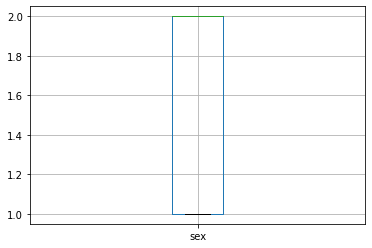

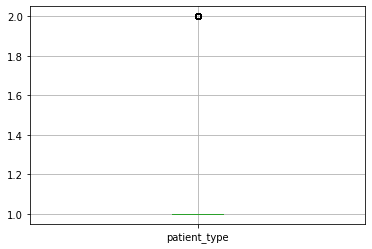

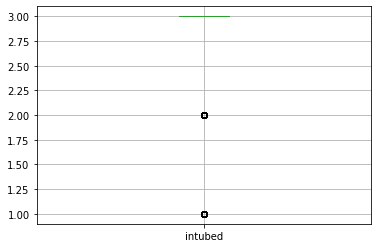

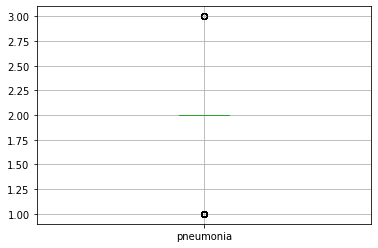

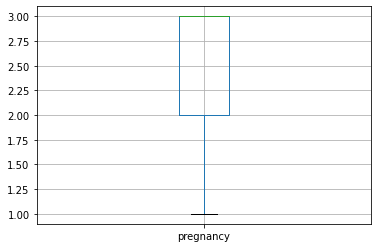

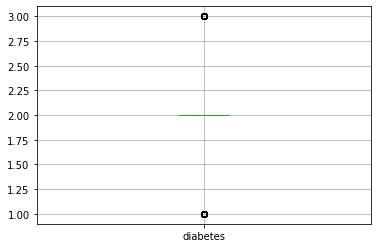

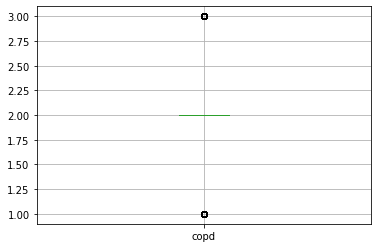

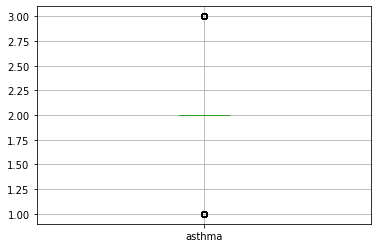

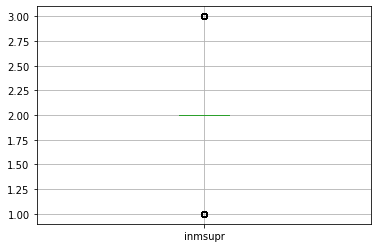

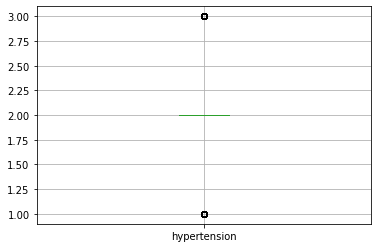

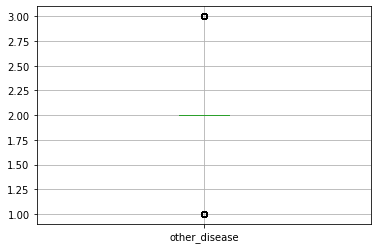

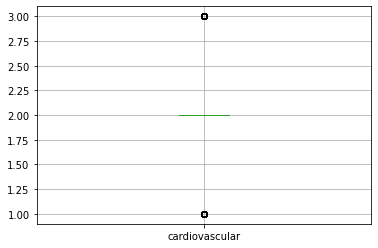

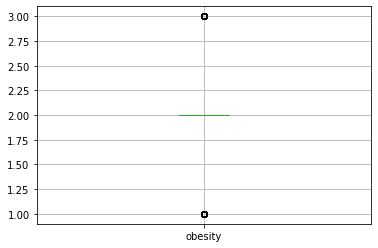

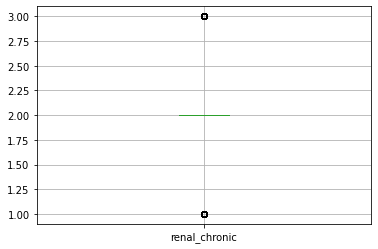

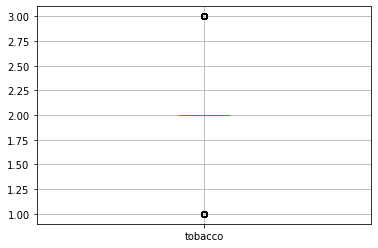

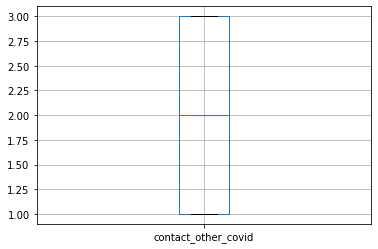

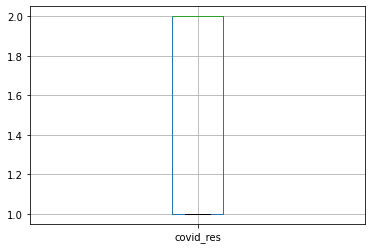

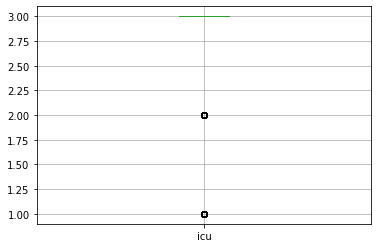

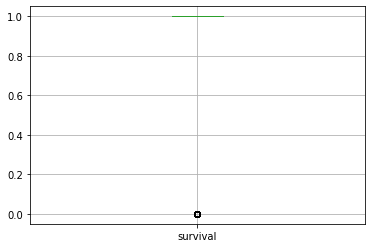

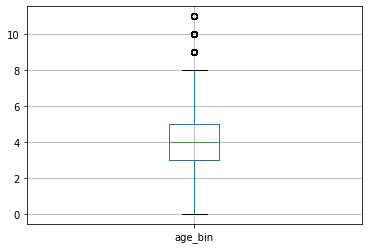

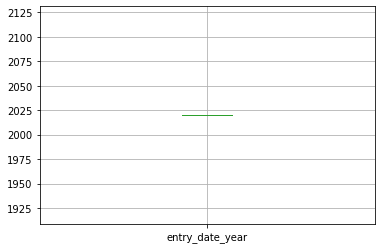

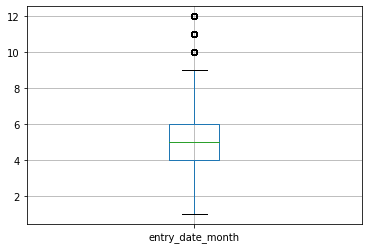

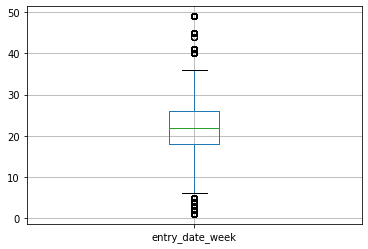

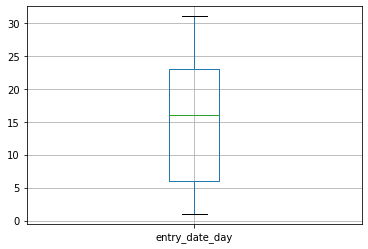

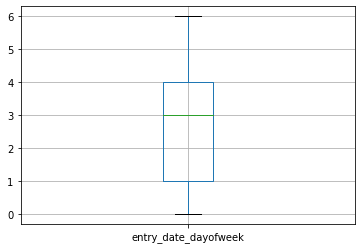

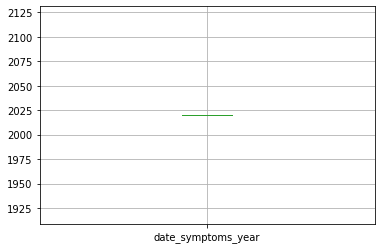

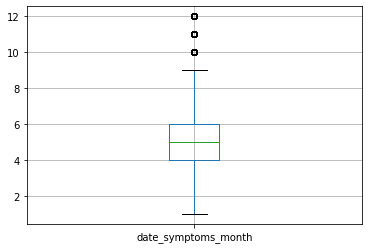

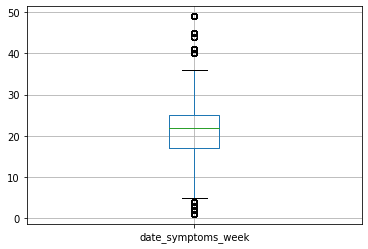

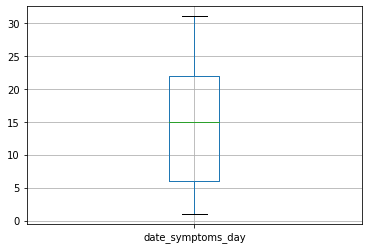

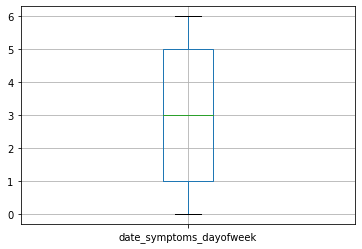

In [ ]:
for column in df_class:
    plt.figure()
    df_class.boxplot([column])

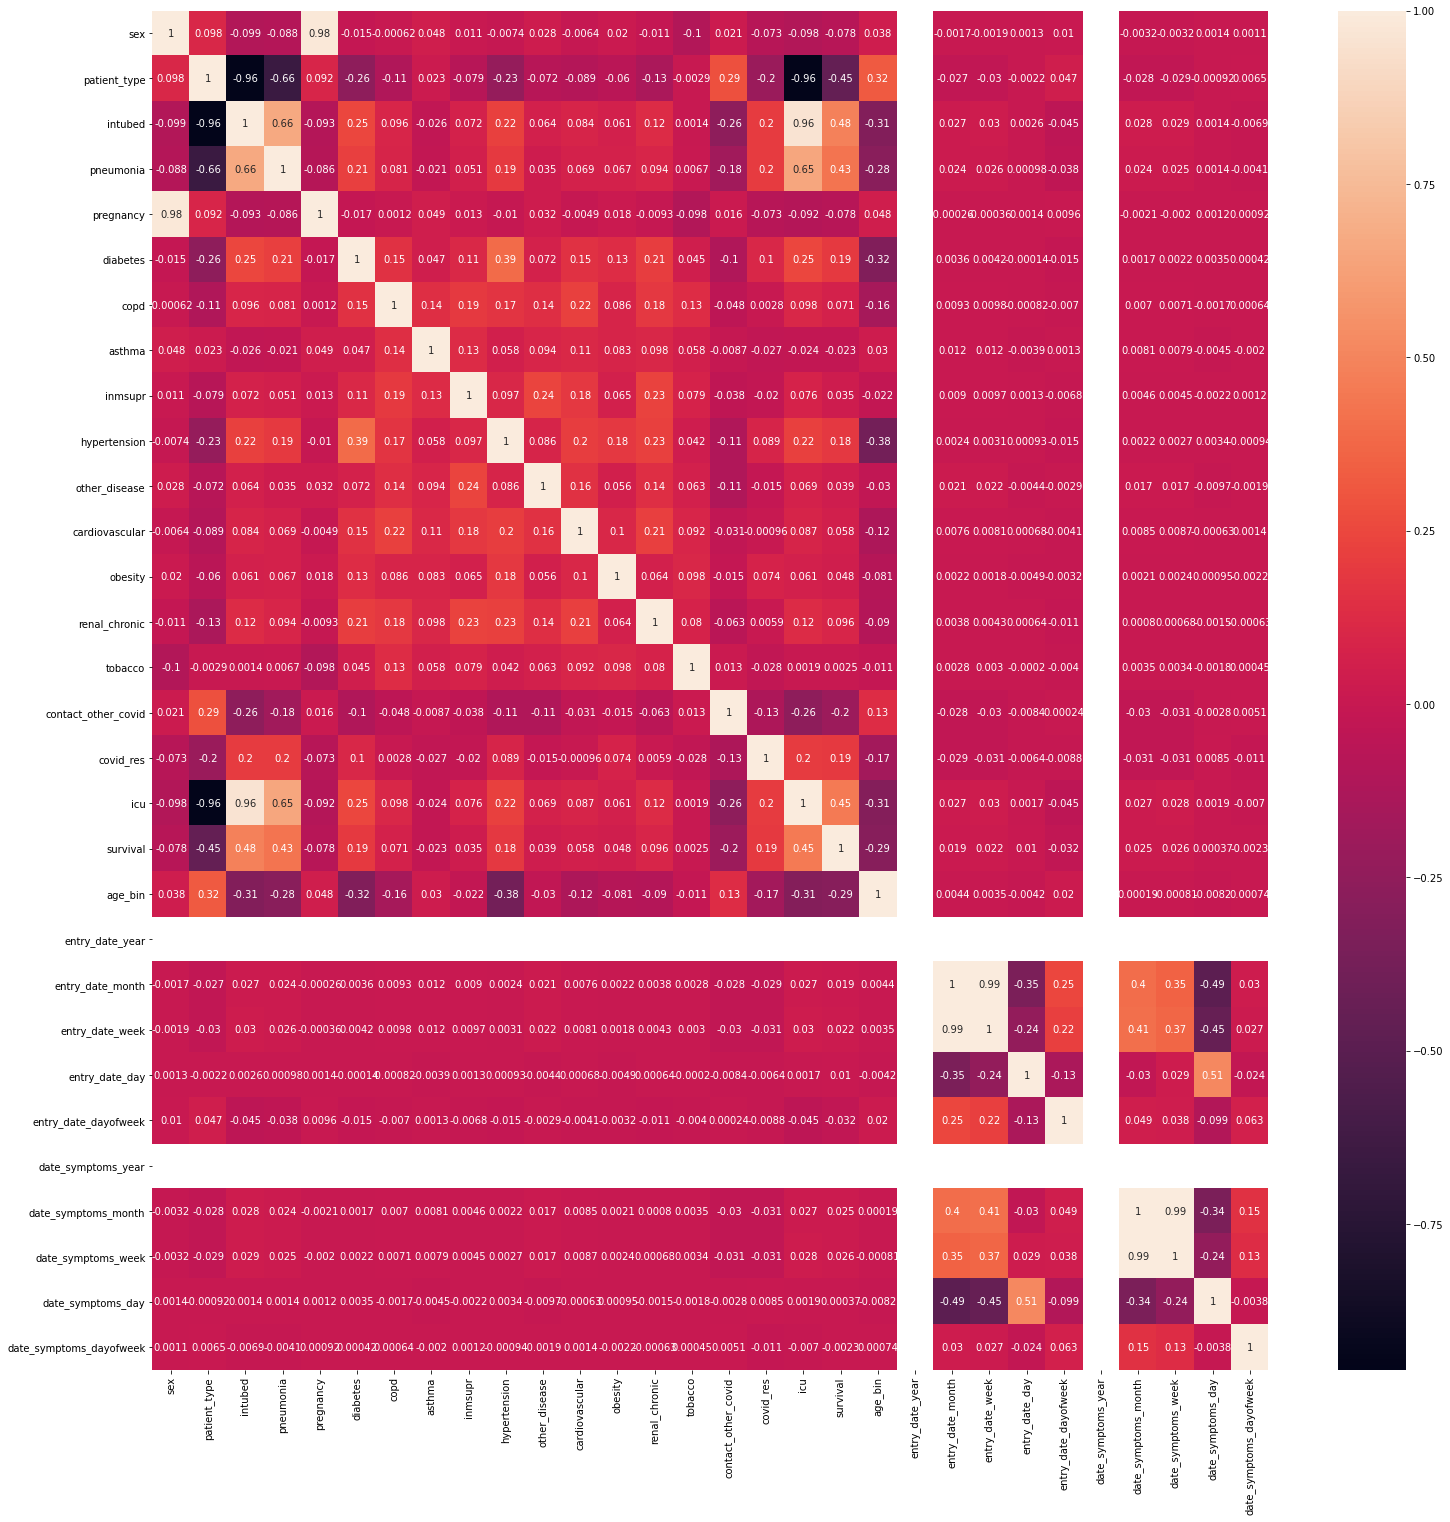

In [ ]:
#Provide a plot to show correlation matrix between attributes in the dataset 
cor_cov = df_class.corr()
f, ax = plt.subplots(figsize =(25,25))
sns.heatmap(cor_cov, annot = True)

In [ ]:
#statistics on the null, unique, missing and duplicate values within the covid classification dataset 
def info(data_fr):
  for col in data_fr.columns:
    print(col ,'value_counts: ',data_fr[col].value_counts())
    print(col ,'total values: ',len(data_fr[col]))
    print(col ,'null values: ',data_fr[col].isna().sum())
    print(col ,'non-null values: ',data_fr[col].notnull().sum())
    print('is unique: ', data_fr[col].nunique()/len(data_fr[col]))
    print(col ,'duplicate values: ', (len(data_fr[col]) - data_fr[col].nunique()))
    print('\n') 

In [ ]:
info (df_class)

sex value_counts:  2    253098
1    246594
Name: sex, dtype: int64
sex total values:  499692
sex null values:  0
sex non-null values:  499692
is unique:  4.0024655187595555e-06
sex duplicate values:  499690


patient_type value_counts:  1    392146
2    107546
Name: patient_type, dtype: int64
patient_type total values:  499692
patient_type null values:  0
patient_type non-null values:  499692
is unique:  4.0024655187595555e-06
patient_type duplicate values:  499690


intubed value_counts:  3    392268
2     98321
1      9103
Name: intubed, dtype: int64
intubed total values:  499692
intubed null values:  0
intubed non-null values:  499692
is unique:  6.003698278139334e-06
intubed duplicate values:  499689


pneumonia value_counts:  2    420965
1     78716
3        11
Name: pneumonia, dtype: int64
pneumonia total values:  499692
pneumonia null values:  0
pneumonia non-null values:  499692
is unique:  6.003698278139334e-06
pneumonia duplicate values:  499689


pregnancy value_counts:  3  

### RFECV for feature engineering 

In [ ]:
# #RFE is an expensive process, so we try to locate the highly correlated features and drop them since they provide the same information 
# # survival is removed since its the class label 
correlation_matrix = df_class.drop('survival', axis=1).corr()

 for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.8:
           colname = correlation_matrix.columns[i]
           correlated_features.add(colname)

In [ ]:
#  correlated_features

{'date_symptoms_week', 'entry_date_week', 'icu', 'intubed', 'pregnancy'}

In [ ]:
df_class.head()

,sex,patient_type,intubed,pneumonia,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,survival,age_bin,entry_date_year,entry_date_month,entry_date_week,entry_date_day,entry_date_dayofweek,date_symptoms_year,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek
0,2,1,3,2,3,2,2,2,2,2,2,2,2,2,2,2,1,3,1,2,2020,4,14,5,6,2020,2,6,5,2
1,2,1,3,2,3,2,2,2,2,2,2,2,2,2,2,3,1,3,1,2,2020,3,12,19,3,2020,3,12,17,1
2,1,2,2,2,2,2,2,2,2,2,2,2,1,2,2,3,1,2,1,5,2020,6,23,4,3,2020,1,1,4,5
3,2,2,2,1,3,2,2,2,2,2,2,2,2,2,2,3,1,2,1,2,2020,4,16,17,4,2020,10,40,4,6
4,1,2,2,2,2,1,2,2,2,1,2,1,2,2,2,3,1,2,0,5,2020,4,16,13,0,2020,4,16,13,0


In [ ]:
df_class.columns

Index(['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res', 'icu', 'survival', 'age_bin',
       'entry_date_year', 'entry_date_month', 'entry_date_week',
       'entry_date_day', 'entry_date_dayofweek', 'date_symptoms_year',
       'date_symptoms_month', 'date_symptoms_week', 'date_symptoms_day',
       'date_symptoms_dayofweek'],
      dtype='object')

In [ ]:
columns = ['sex', 'patient_type', 'intubed', 'pneumonia', 'pregnancy', 'diabetes',
       'copd', 'asthma', 'inmsupr', 'hypertension', 'other_disease',
       'cardiovascular', 'obesity', 'renal_chronic', 'tobacco',
       'contact_other_covid', 'covid_res', 'icu']

df_class[columns] = df_class[columns].astype(str)
df_class.dtypes

sex                        object
patient_type               object
intubed                    object
pneumonia                  object
pregnancy                  object
diabetes                   object
copd                       object
asthma                     object
inmsupr                    object
hypertension               object
other_disease              object
cardiovascular             object
obesity                    object
renal_chronic              object
tobacco                    object
contact_other_covid        object
covid_res                  object
icu                        object
survival                    int64
age_bin                     int64
entry_date_year             int64
entry_date_month            int64
entry_date_week             int64
entry_date_day              int64
entry_date_dayofweek        int64
date_symptoms_year          int64
date_symptoms_month         int64
date_symptoms_week          int64
date_symptoms_day           int64
date_symptoms_

In [ ]:

X, y = df_class.drop(['survival'], axis=1), df_class['survival']

## Feature Encoding

In [ ]:
X = pd.DataFrame(X)
X = pd.get_dummies(X, prefix_sep='_', drop_first=True)
X.head()
X.columns

Index(['age_bin', 'entry_date_year', 'entry_date_month', 'entry_date_week',
       'entry_date_day', 'entry_date_dayofweek', 'date_symptoms_year',
       'date_symptoms_month', 'date_symptoms_week', 'date_symptoms_day',
       'date_symptoms_dayofweek', 'sex_2', 'patient_type_2', 'intubed_2',
       'intubed_3', 'pneumonia_2', 'pneumonia_3', 'pregnancy_2', 'pregnancy_3',
       'diabetes_2', 'diabetes_3', 'copd_2', 'copd_3', 'asthma_2', 'asthma_3',
       'inmsupr_2', 'inmsupr_3', 'hypertension_2', 'hypertension_3',
       'other_disease_2', 'other_disease_3', 'cardiovascular_2',
       'cardiovascular_3', 'obesity_2', 'obesity_3', 'renal_chronic_2',
       'renal_chronic_3', 'tobacco_2', 'tobacco_3', 'contact_other_covid_2',
       'contact_other_covid_3', 'covid_res_2', 'icu_2', 'icu_3'],
      dtype='object')

## Data Transformation

In [ ]:
#scale the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape

(399753, 44)

In [ ]:
# putting X_train into a dataframe for rfecv evaluation
X_df_class = pd.DataFrame(X_train)
X_df_class.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43
0,-1.016083,0.0,-0.297145,-0.138195,1.591294,0.618300,0.0,-0.247170,-0.081380,1.510131,0.005963,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,-0.666427,0.889262,-0.495229,0.523307
1,1.965230,0.0,1.351464,1.240962,-1.067684,1.648518,0.0,-0.647452,-0.749121,-0.995894,-1.443464,0.987068,1.909531,2.020458,-1.910912,-2.312390,-0.004692,-0.967693,0.981802,-2.609388,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,1.500538,-1.124529,2.019269,-1.910924
2,-1.016083,0.0,-0.297145,-0.236706,0.550824,-0.411917,0.0,-0.247170,-0.176771,0.371029,-1.443464,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,1.500538,-1.124529,-0.495229,0.523307
3,-2.208608,0.0,-1.121450,-0.926285,1.822509,-0.927026,0.0,-1.047734,-0.939904,1.054490,-0.960322,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,-0.666427,0.889262,-0.495229,0.523307
4,-0.419820,0.0,0.115007,0.157339,0.550824,1.133409,0.0,0.153112,0.204795,0.257119,-0.477180,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,1.533783,-0.666427,-1.124529,-0.495229,0.523307


In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(10), scoring='accuracy')
rfecv.fit(X, y)

RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=101), scoring='accuracy')

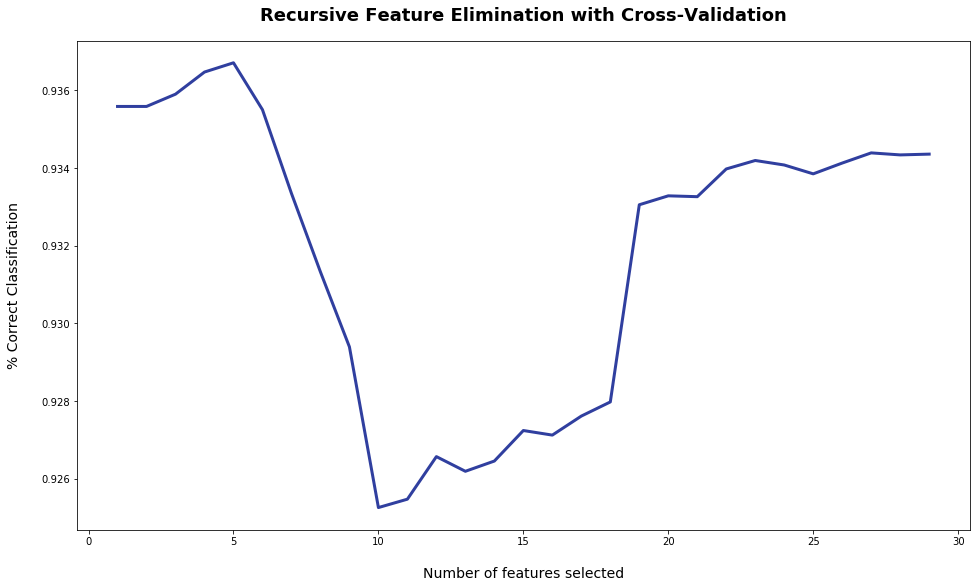

In [ ]:
plotting the rfecv chart for feature selection
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('% Correct Classification', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [ ]:
df_x = pd.DataFrame(X, columns = ['age_bin', 'entry_date_year', 'entry_date_month', 'entry_date_week',
       'entry_date_day', 'entry_date_dayofweek', 'date_symptoms_year',
       'date_symptoms_month', 'date_symptoms_week', 'date_symptoms_day',
       'date_symptoms_dayofweek', 'sex_2', 'patient_type_2', 'intubed_2',
       'intubed_3', 'pneumonia_2', 'pneumonia_3', 'pregnancy_2', 'pregnancy_3',
       'diabetes_2', 'diabetes_3', 'copd_2', 'copd_3', 'asthma_2', 'asthma_3',
       'inmsupr_2', 'inmsupr_3', 'hypertension_2', 'hypertension_3',
       'other_disease_2', 'other_disease_3', 'cardiovascular_2',
       'cardiovascular_3', 'obesity_2', 'obesity_3', 'renal_chronic_2',
       'renal_chronic_3', 'tobacco_2', 'tobacco_3', 'contact_other_covid_2',
       'contact_other_covid_3', 'covid_res_2', 'icu_2', 'icu_3'])

#print(np.where(rfecv.support_ == False)[0])
#df_x.drop(df_x.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)

In [ ]:
df_x.columns

Index(['age_bin', 'entry_date_year', 'entry_date_month', 'entry_date_week',
       'entry_date_day', 'entry_date_dayofweek', 'date_symptoms_year',
       'date_symptoms_month', 'date_symptoms_week', 'date_symptoms_day',
       'date_symptoms_dayofweek', 'sex_2', 'patient_type_2', 'intubed_2',
       'intubed_3', 'pneumonia_2', 'pneumonia_3', 'pregnancy_2', 'pregnancy_3',
       'diabetes_2', 'diabetes_3', 'copd_2', 'copd_3', 'asthma_2', 'asthma_3',
       'inmsupr_2', 'inmsupr_3', 'hypertension_2', 'hypertension_3',
       'other_disease_2', 'other_disease_3', 'cardiovascular_2',
       'cardiovascular_3', 'obesity_2', 'obesity_3', 'renal_chronic_2',
       'renal_chronic_3', 'tobacco_2', 'tobacco_3', 'contact_other_covid_2',
       'contact_other_covid_3', 'covid_res_2', 'icu_2', 'icu_3'],
      dtype='object')

In [ ]:
df_x

,age_bin,entry_date_year,entry_date_month,entry_date_week,entry_date_day,entry_date_dayofweek,date_symptoms_year,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek,sex_2,patient_type_2,intubed_2,intubed_3,pneumonia_2,pneumonia_3,pregnancy_2,pregnancy_3,diabetes_2,diabetes_3,copd_2,copd_3,asthma_2,asthma_3,inmsupr_2,inmsupr_3,hypertension_2,hypertension_3,other_disease_2,other_disease_3,cardiovascular_2,cardiovascular_3,obesity_2,obesity_3,renal_chronic_2,renal_chronic_3,tobacco_2,tobacco_3,contact_other_covid_2,contact_other_covid_3,covid_res_2,icu_2,icu_3
0,-1.016083,0.0,-0.709298,-0.926285,-1.183292,1.648518,0.0,-1.448016,-1.607644,-1.109804,-0.477180,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.162970,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,1.533783,-0.666427,-1.124529,-0.495229,0.523307
1,-1.016083,0.0,-1.121450,-1.123307,0.435216,0.103191,0.0,-1.047734,-1.035295,0.257119,-0.960322,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.162970,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,1.500538,-1.124529,-0.495229,0.523307
2,0.772705,0.0,0.115007,-0.039683,-1.298900,0.103191,0.0,-1.848299,-2.084602,-1.223714,0.972247,-1.013102,1.909531,2.020458,-1.910912,0.432453,-0.004692,1.033385,-1.018535,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.162970,-0.055036,-2.234185,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,1.500538,-1.124529,2.019269,-1.910924
3,-1.016083,0.0,-0.709298,-0.729262,0.204001,0.618300,0.0,1.754240,1.635667,-1.223714,1.455390,0.987068,1.909531,2.020458,-1.910912,-2.312390,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.162970,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,1.500538,-1.124529,2.019269,-1.910924
4,0.772705,0.0,-0.709298,-0.729262,-0.258430,-1.442135,0.0,-0.647452,-0.653729,-0.198522,-1.443464,-1.013102,1.909531,2.020458,-1.910912,0.432453,-0.004692,1.033385,-1.018535,-2.609388,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,-2.243394,-0.054669,0.190985,-0.066393,-6.136116,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,1.500538,-1.124529,2.019269,-1.910924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499687,1.965230,0.0,-1.121450,-1.024796,1.244471,0.103191,0.0,-1.047734,-1.035295,0.598850,0.489105,0.987068,-0.523689,-0.494937,0.523310,-2.312390,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,-5.236011,-0.066393,0.162970,-0.055036,0.447591,-0.054318,0.153446,-0.054429,-3.196946,-0.056302,1.533783,-0.666427,0.889262,-0.495229,0.523307
499688,1.368968,0.0,-1.121450,-1.024796,1.475686,1.133409,0.0,-1.047734,-0.939904,0.940580,-1.443464,0.987068,1.909531,-0.494937,-1.910912,-2.312390,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,-2.243394,-0.054669,0.190985,-0.066393,0.162970,-0.055036,-2.234185,-0.054318,0.153446,-0.054429,-3.196946,-0.056302,1.533783,-0.666427,0.889262,2.019269,-1.910924
499689,-1.016083,0.0,-1.121450,-1.123307,0.088393,-1.442135,0.0,-1.047734,-1.130687,-0.198522,0.489105,-1.013102,-0.523689,-0.494937,0.523310,0.432453,-0.004692,1.033385,-1.018535,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.162970,-0.055036,0.447591,-0.054318,0

In [ ]:
optimal_features = X[:, rfecv.support_] # selector is a RFECV fitted object

n = 15 # to select top 6 features
feature_ranks = rfecv.ranking_  # selector is a RFECV fitted object
feature_ranks_with_idx = enumerate(feature_ranks)
sorted_ranks_with_idx = sorted(feature_ranks_with_idx, key=lambda x: x[1])
top_n_idx = [idx for idx, rnk in sorted_ranks_with_idx[:n]]

# top_n_features = X[:15, top_n_idx]
# print(sorted_ranks_with_idx)

[(1, 1), (2, 1), (3, 1), (4, 1), (18, 1), (27, 2), (22, 3), (26, 4), (21, 5), (28, 6), (23, 7), (16, 8), (17, 9), (13, 10), (6, 11), (5, 12), (25, 13), (10, 14), (20, 15), (15, 16), (11, 17), (14, 18), (12, 19), (0, 20), (7, 21), (9, 22), (8, 23), (19, 24), (24, 25)]


In [ ]:
#check rfecv
print(rfecv.estimator_.feature_importances_)

[0.25392384 0.24147929 0.12395116 0.17092723 0.20971848]


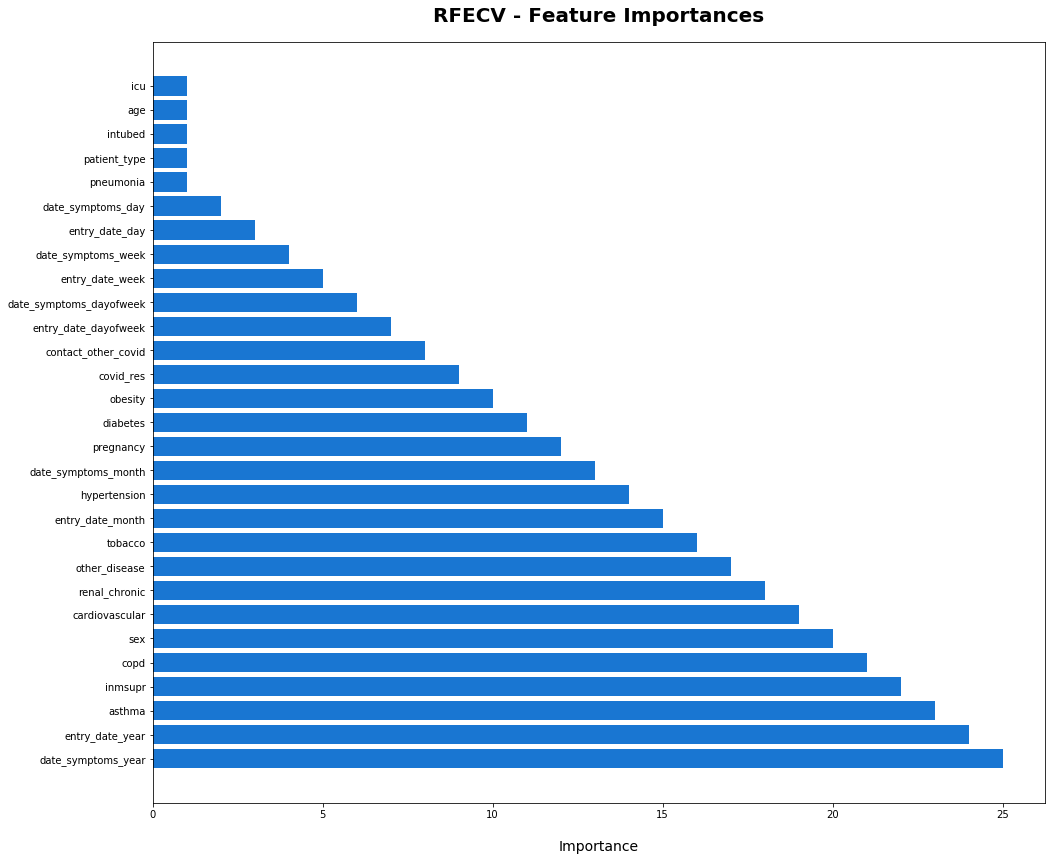

In [ ]:
plotting a bargraph of each selected feature according to their importance
dset = pd.DataFrame()
dset['attr'] = df_x.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset['importance'] = feature_ranks

dset = dset.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:

# df_x.drop(['cardiovascular', 'copd', 'sex', 'inmsupr','asthma','entry_date_year',
#             'renal_chronic','other_disease','tobacco', 'entry_date_month', 'hypertension',
#             'date_symptoms_month','pregnancy', 'diabetes', 'obesity', 'covid_res', 'contact_other_covid',
#             'entry_date_dayofweek', 'date_symptoms_dayofweek', 'date_symptoms_week',
#             'entry_date_week','date_symptoms_year', 'entry_date_day', 'date_symptoms_day', 
#           'age_bin'], axis = 1, inplace = True)



In [ ]:
df_x.dtypes

age_bin                    float64
entry_date_year            float64
entry_date_month           float64
entry_date_week            float64
entry_date_day             float64
entry_date_dayofweek       float64
date_symptoms_year         float64
date_symptoms_month        float64
date_symptoms_week         float64
date_symptoms_day          float64
date_symptoms_dayofweek    float64
sex_2                      float64
patient_type_2             float64
intubed_2                  float64
intubed_3                  float64
pneumonia_2                float64
pneumonia_3                float64
pregnancy_2                float64
pregnancy_3                float64
diabetes_2                 float64
diabetes_3                 float64
copd_2                     float64
copd_3                     float64
asthma_2                   float64
asthma_3                   float64
inmsupr_2                  float64
inmsupr_3                  float64
hypertension_2             float64
hypertension_3      

## Data oversampling with SMOTE

In [ ]:
 # splitting the dataset before applying smote oversampling
X_train, X_test, y_train, y_test = train_test_split(df_x, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape

(399753, 44)

In [ ]:
y_train.shape

(399753,)

In [ ]:
# applying smote oversampling to address data imbalance
smote = SMOTE(random_state=1, k_neighbors=6)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
print(X_smote.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(744912, 44)


In [ ]:
#converting y_train to a dataframe for plotting
y_df = pd.DataFrame(y_train)
print(y_df['survival'].value_counts())

1    372456
0     27297
Name: survival, dtype: int64


In [ ]:
y_df

,survival
312038,1
177851,0
146975,1
480979,1
29475,1
...,...
305690,1
385478,1
207099,1
104587,0


In [ ]:
y_smote.shape

(744912,)

In [ ]:
X_smote.shape

(744912, 44)

In [ ]:
#converting y_smote to a dataframe for plotting
y_sdf = pd.DataFrame(y_smote)
#print(y_sdf['survival'].value_counts())
y_sdf.value_counts()

1    372456
0    372456
dtype: int64

In [ ]:
y_sdf

,0
0,1
1,0
2,1
3,1
4,1
...,...
744907,0
744908,0
744909,0
744910,0


   Y train  Y smote
0   372456   372456
1    27297   372456


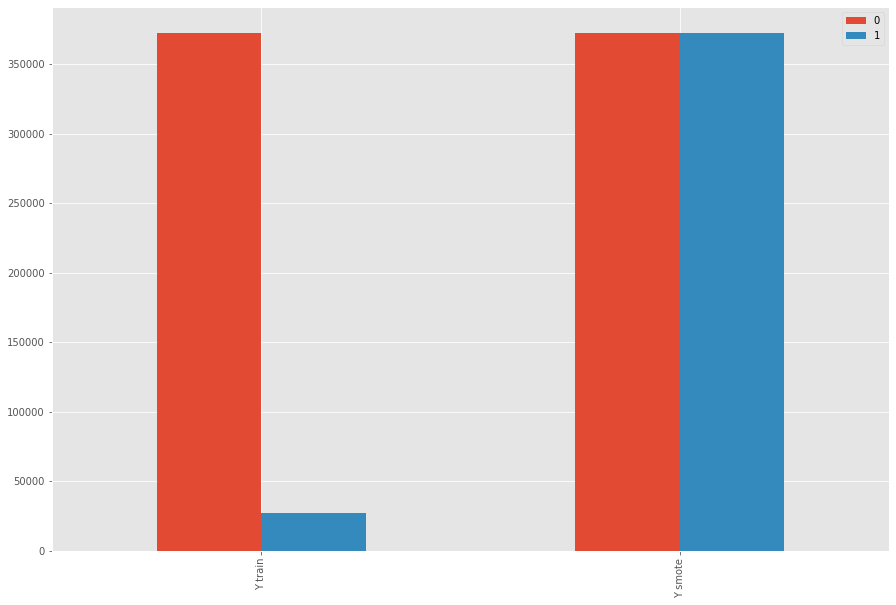

In [ ]:
# plotting the dataset before and after smote oversampling
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
y_dict = {'Y train': [372456, 27297], 'Y smote': [372456, 372456]}
y_comb = pd.DataFrame(data=y_dict)
print(y_comb)
#plotting the rss values of each feature on the train and test data side by side as a multiple bargraph
style.use('ggplot')
y_comb.T.plot(kind='bar',figsize=(15,10))


# Modelling (Classification)

## KNN

In [ ]:
#creating a KNN model
knn = KNeighborsClassifier()
knn.fit(X_smote, y_smote)

# printing out its performance
y_pred_knn = knn.predict(X_test)
print (accuracy_score(y_test, y_pred_knn))
print(metrics.classification_report(y_test, y_pred_knn))

0.8876014368764946
              precision    recall  f1-score   support

           0       0.35      0.76      0.48      6824
           1       0.98      0.90      0.94     93115

    accuracy                           0.89     99939
   macro avg       0.67      0.83      0.71     99939
weighted avg       0.94      0.89      0.91     99939



## Logistic Regression

In [ ]:
# using the logistic regression model to establish a baseline performance
lr_model = LogisticRegression()
lr_model.fit(X_smote, y_smote)

tuned_parameters = {'C': [0.1, 0.5, 1, 5, 10, 50, 100]}
grid = GridSearchCV(LogisticRegression(solver='liblinear'), tuned_parameters, cv=3, scoring="accuracy")
grid.fit(X_smote, y_smote)

# printing out its performance
y_pred_lr = lr_model.predict(X_test)
print (accuracy_score(y_test, y_pred_lr))
print(metrics.classification_report(y_test, y_pred_lr))

0.8763145518766448
              precision    recall  f1-score   support

           0       0.35      0.90      0.50      6824
           1       0.99      0.87      0.93     93115

    accuracy                           0.88     99939
   macro avg       0.67      0.89      0.71     99939
weighted avg       0.95      0.88      0.90     99939



## SVM

In [ ]:
parameters = {'C': [1, 5], 
          'gamma': [0.001, 0.01]}
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=parameters)
grid.fit(X_smote, y_smote)
print(grid)
svm = grid.best_estimator_
print("done!")


In [ ]:
# printing out its performance
y_pred_svm = svm.predict(X_test)
print (accuracy_score(y_test, y_pred_svm))
print(metrics.classification_report(y_test, y_pred_svm))

## Decision Tree

In [ ]:
from sklearn import tree
from sklearn.metrics import fbeta_score, make_scorer
dt = tree.DecisionTreeClassifier(random_state=7)
parameters = {"max_depth": range(1,20), "random_state":[7]}
scorer = make_scorer(fbeta_score,beta=0.5)
grid = GridSearchCV(estimator=dt,param_grid=parameters,scoring=scorer)
grid.fit(X_smote, y_smote)
dec_tree = grid.best_estimator_

# printing out its performance
y_pred_dt = dec_tree.predict(X_test)
print (accuracy_score(y_test, y_pred_dt))
print(metrics.classification_report(y_test, y_pred_dt))


0.9204714876074406
              precision    recall  f1-score   support

           0       0.44      0.63      0.52      6824
           1       0.97      0.94      0.96     93115

    accuracy                           0.92     99939
   macro avg       0.71      0.78      0.74     99939
weighted avg       0.94      0.92      0.93     99939



## CAT Boost

In [ ]:
!pip3 install catboost
from catboost import CatBoostClassifier
grid = GridSearchCV(CatBoostClassifier(n_estimators=200, silent=False), cv=3,
                param_grid={'learning_rate': [0.03], 'max_depth': [3]})
grid.fit(X_smote, y_smote)
cat = grid.best_estimator_

# printing out its performance
y_pred_cat = cat.predict(X_test)
print (accuracy_score(y_test, y_pred_cat))
print(metrics.classification_report(y_test, y_pred_cat))

     |████████████████████████████████| 67.3MB 58kB/s 
0:	learn: 0.6595767	total: 206ms	remaining: 40.9s
1:	learn: 0.6288002	total: 363ms	remaining: 35.9s
2:	learn: 0.6009029	total: 528ms	remaining: 34.7s
3:	learn: 0.5742396	total: 686ms	remaining: 33.6s
4:	learn: 0.5506847	total: 843ms	remaining: 32.9s
5:	learn: 0.5300384	total: 999ms	remaining: 32.3s
6:	learn: 0.5102186	total: 1.15s	remaining: 31.8s
7:	learn: 0.4931406	total: 1.3s	remaining: 31.2s
8:	learn: 0.4755049	total: 1.47s	remaining: 31.3s
9:	learn: 0.4596604	total: 1.64s	remaining: 31.1s
10:	learn: 0.4448219	total: 1.8s	remaining: 30.9s
11:	learn: 0.4313174	total: 1.96s	remaining: 30.7s
12:	learn: 0.4196773	total: 2.12s	remaining: 30.5s
13:	learn: 0.4090636	total: 2.27s	remaining: 30.2s
14:	learn: 0.3986130	total: 2.43s	remaining: 30s
15:	learn: 0.3888927	total: 2.59s	remaining: 29.7s
16:	learn: 0.3793668	total: 2.74s	remaining: 29.5s
17:	learn: 0.3712296	total: 2.9s	remaining: 29.3s
18:	learn: 0.3644571	total: 3.05s	remainin

## XGB

In [ ]:
# creating a xgbclassifier model
xgb = XGBClassifier()
# xgb.fit(X_train_smote, y_smote)

xgb_stack = GridSearchCV(
            estimator=xgb,
            param_grid={"learning_rate": (0.05, 0.10, 0.15),
                        "max_depth": [ 3, 4, 5, 6, 8],
                        "min_child_weight": [ 1, 3, 5, 7],
                        "gamma":[ 0.0, 0.1, 0.2],
                        "colsample_bytree":[ 0.3, 0.4],},
            cv=3, scoring='neg_log_loss', verbose=0, n_jobs=-1)

xgb_stack.fit(X_smote, y_smote)

print("Done!")

In [ ]:
# printing out its performance
y_pred_xgb = xgb_stack.predict(X_test)
print (accuracy_score(y_test, y_pred_xgb))
print(metrics.classification_report(y_test, y_pred_xgb))

In [ ]:
# printing out its performance
# without onehot encoding
y_pred_xgb = xgb_stack.predict(X_test)
print (accuracy_score(y_test, y_pred_xgb))
print(metrics.classification_report(y_test, y_pred_xgb))

0.9367914427800959
              precision    recall  f1-score   support

           0       0.53      0.59      0.56      6824
           1       0.97      0.96      0.97     93115

    accuracy                           0.94     99939
   macro avg       0.75      0.77      0.76     99939
weighted avg       0.94      0.94      0.94     99939



In [ ]:
#pickle the model
import pickle
pickl = {'model': model}
pickle.dump( pickl, open( 'model_file' + ".p", 


### Neural Network



In [ ]:
# building a simple RNN model with a single dense sigmoid layer to fit our binary class data
from keras.layers import Embedding,SimpleRNN
from keras.layers import Flatten, Dense
from keras.layers import Embedding,SimpleRNN

input_shape = [X_smote.shape[1]]
# input_layer = Input(shape=(X.shape[1],))
# model_rnn = Sequential()
# model_rnn.add(Dense(32, activation='relu', input_shape=[33]))
# model_rnn.add(Dropout(rate=0.3))
# model_rnn.add(BatchNormalization())
# model_rnn.add(SimpleRNN(32))
# model_rnn.add(Dropout(rate=0.3))
# model_rnn.add(BatchNormalization())
# model_rnn.add(Dense(1, activation='sigmoid'))
# model_rnn.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['binary_accuracy'])
# model_rnn.summary()

from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[22]),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
  
    layers.Dense(32, activation='relu'),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid'),
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history_rnn = model.fit(X_smote, y_smote, epochs=1000, callbacks=[early_stopping],
    verbose=0, batch_size=512, validation_split=0.2)


In [ ]:
# predict crisp classes for test set
rnn_y_classes = model.predict_classes(X_test, verbose=0)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# obtain performance of RNN model
print(metrics.classification_report(y_test, rnn_y_classes))

              precision    recall  f1-score   support

           0       0.35      0.91      0.51      6824
           1       0.99      0.88      0.93     93115

    accuracy                           0.88     99939
   macro avg       0.67      0.89      0.72     99939
weighted avg       0.95      0.88      0.90     99939



### LSTM

In [ ]:
len(X_smote)

744912

In [ ]:
X_smote1 = X_smote.reshape(len(X_smote), 1, X_smote.shape[1])
#X_test1 = X_test.values.reshape(len(X_test), 1, X_test.shape[1])
X_test1 = np.expand_dims(X_test, 1)
y_smote1 = np.expand_dims(y_smote, 1)
y_test1 = np.expand_dims(y_test, 1)
#y_smote1 = y_smote.reshape(len(y_smote), 1, y_smote.shape[1])
#y_test1 = y_test.values.reshape(len(y_test), 1, y_test.shape[1])

In [ ]:
X_smote1.shape

(744912, 1, 44)

In [ ]:
y_smote1.shape

(744912, 1)

In [ ]:
X_test1.shape

(99939, 1, 44)

In [ ]:
y_test1.shape

(99939, 1)

In [ ]:
#X_smote1 = X_smote.reshape(len(X_smote), 1, X_smote.shape[1])
# X_smote1 = np.expand_dims(X_smote, 1)
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM
from keras.layers.normalization import BatchNormalization


lstm_class_model = Sequential()
lstm_class_model.add(LSTM(200, activation='relu', input_shape=(X_smote1.shape[1:]), return_sequences=True))
lstm_class_model.add(Dropout(0.2))
lstm_class_model.add(BatchNormalization())
lstm_class_model.add(LSTM(100,activation='relu', return_sequences=True))
lstm_class_model.add(Dropout(0.2))
lstm_class_model.add(BatchNormalization())

lstm_class_model.add(Dense(1, activation='sigmoid'))

lstm_class_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
lstm_class_model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_28 (LSTM)               (None, 1, 200)            196000    
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 200)            0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 1, 200)            800       
_________________________________________________________________
lstm_29 (LSTM)               (None, 1, 100)            120400    
_________________________________________________________________
dropout_29 (Dropout)         (None, 1, 100)            0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 1, 100)            400       
_________________________________________________________________
dense_11 (Dense)             (None, 1, 1)            

In [ ]:
history_lstm = lstm_class_model.fit(X_smote1, y_smote1, epochs=10, callbacks=[early_stopping], batch_size=512, validation_split=0.2)


Epoch 1/10
1164/1164 [==============================] - 51s 41ms/step - loss: 0.2966 - binary_accuracy: 0.8824 - val_loss: 0.2454 - val_binary_accuracy: 0.9345
Epoch 2/10
1164/1164 [==============================] - 47s 41ms/step - loss: 0.2404 - binary_accuracy: 0.8995 - val_loss: 0.2636 - val_binary_accuracy: 0.9331
Epoch 3/10
1164/1164 [==============================] - 47s 41ms/step - loss: 0.2300 - binary_accuracy: 0.9044 - val_loss: 0.2558 - val_binary_accuracy: 0.9311
Epoch 4/10
1164/1164 [==============================] - 47s 41ms/step - loss: 0.2254 - binary_accuracy: 0.9059 - val_loss: 0.2169 - val_binary_accuracy: 0.9429
Epoch 5/10
1164/1164 [==============================] - 47s 41ms/step - loss: 0.2209 - binary_accuracy: 0.9078 - val_loss: 0.2182 - val_binary_accuracy: 0.9408
Epoch 6/10
1164/1164 [==============================] - 48s 41ms/step - loss: 0.2150 - binary_accuracy: 0.9108 - val_loss: 0.2309 - val_binary_accuracy: 0.9365
Epoch 7/10
1164/1164 [==================

In [ ]:
#predict crisp classes for test set of LSTM
Lstm_classes = lstm_class_model.predict_classes(X_test1, verbose=2)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


3124/3124 - 7s


In [ ]:
print(metrics.classification_report(y_test1, (np.squeeze(Lstm_classes, axis=(2,)))))

              precision    recall  f1-score   support

           0       0.38      0.86      0.53      6824
           1       0.99      0.90      0.94     93115

    accuracy                           0.89     99939
   macro avg       0.68      0.88      0.73     99939
weighted avg       0.95      0.89      0.91     99939



In [ ]:
print(metrics.classification_report(y_test1, (np.squeeze(Lstm_classes, axis=(2,)))))

              precision    recall  f1-score   support

           0       0.37      0.89      0.53      6824
           1       0.99      0.89      0.94     93115

    accuracy                           0.89     99939
   macro avg       0.68      0.89      0.73     99939
weighted avg       0.95      0.89      0.91     99939



In [ ]:
np.squeeze(Lstm_classes, axis=(2,))


(99939, 1, 1)
(99939, 1)


# Exploration of the Regression dataset 

In [ ]:
#creating the regression dataset
# 1- survived, 0- died 
df_reg = df.loc[(df['survival']== 0)]
df_reg

,id,sex,patient_type,entry_date,date_symptoms,date_died,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,dd,ed,Days_to_die,survival
4,0d01b5,1,2,13-04-2020,13-04-2020,22-04-2020,2,2,60,2,1,2,2,2,1,2,1,2,2,2,99,1,2,2020-04-22,2020-04-13,9.0,0
5,1beec8,2,2,16-04-2020,16-04-2020,29-04-2020,2,1,47,97,1,2,2,2,2,2,2,2,2,2,99,1,1,2020-04-29,2020-04-16,13.0,0
24,008b81,1,1,15-05-2020,06-05-2020,21-05-2020,97,2,61,2,2,2,2,2,1,2,2,2,2,2,1,1,97,2020-05-21,2020-05-15,6.0,0
36,17394f,2,2,27-04-2020,27-04-2020,28-04-2020,2,1,77,97,2,2,2,2,1,2,2,2,2,2,99,1,2,2020-04-28,2020-04-27,1.0,0
41,006ddc,1,2,26-04-2020,23-04-2020,26-04-2020,2,1,53,2,1,2,2,2,2,2,2,1,2,2,99,1,2,2020-04-26,2020-04-26,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499540,16d102,2,2,17-06-2020,17-06-2020,17-06-2020,2,1,73,97,2,2,2,2,2,2,1,2,1,1,99,2,2,2020-06-17,2020-06-17,0.0,0
499574,105f35,2,2,28-03-2020,27-03-2020,02-04-2020,2,1,55,97,1,2,2,1,2,1,2,2,2,1,99,2,2,2020-04-02,2020-03-28,5.0,0
499582,02e521,2,2,29-04-2020,27-04-2020,30-04-2020,2,1,37,97,2,2,2,2,1,2,2,2,2,2,2,2,2,2020-04-30,2020-04-29,1.0,0
499606,16ca9a,2,2,31-03-2020,30-03-2020,20-04-2020,2,1,84,97,2,2,2,2,2,1,1,2,1,2,99,2,2,2020-04-20,2020-03-31,20.0,0


In [ ]:
df_reg = df_reg.drop(df_reg[df_reg['Days_to_die'] <= 0].index)
#df_reg = df_reg.drop(df_reg[df_reg['Days_to_die'] > 30].index)

df_reg.describe()
# df_reg.columns

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Days_to_die,survival
count,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.0
mean,1.653588,1.907547,10.754308,1.256385,60.730043,64.176558,2.176558,2.512729,2.528234,2.571335,2.102077,2.771006,2.551758,2.367098,2.503105,2.502159,61.133333,1.192926,10.803290,24.440058,0.0
std,0.475836,0.289671,27.761741,0.436646,15.218072,45.178911,7.229231,7.373927,7.240732,7.621191,7.075245,8.913205,7.648993,7.622038,7.452729,7.554933,47.420182,0.394604,27.745364,38.089900,0.0
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
25%,1.000000,2.000000,2.000000,1.000000,51.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,0.0
50%,2.000000,2.000000,2.000000,1.000000,61.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,1.000000,2.000000,8.000000,0.0
75%,2.000000,2.000000,2.000000,2.000000,71.000000,97.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,99.000000,1.000000,2.000000,20.000000,0.0
max,2.000000,2.000000,99.000000,2.000000,103.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,99.000000,2.000000,99.000000,173.000000,0.0


In [ ]:
#convert date of symptom to date-time format
df_reg['date_symptoms'] = pd.to_datetime(df_reg['date_symptoms'], infer_datetime_format=True)

In [ ]:
# encoding the date symptoms feature
df_reg['date_symptoms_year'] = df_reg['date_symptoms'].dt.year
df_reg['date_symptoms_month'] = df_reg['date_symptoms'].dt.month
df_reg['date_symptoms_week'] = df_reg['date_symptoms'].dt.week
df_reg['date_symptoms_day'] = df_reg['date_symptoms'].dt.day
df_reg['date_symptoms_dayofweek'] = df_reg['date_symptoms'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
#Encoding the entry_date 
df_reg['ed_year'] = df_reg['ed'].dt.year
df_reg['ed_month'] = df_reg['ed'].dt.month
df_reg['ed_week'] = df_reg['ed'].dt.week
df_reg['ed_day'] = df_reg['ed'].dt.day
df_reg['ed_dayofweek'] = df_reg['ed'].dt.dayofweek

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [ ]:
#drop entry_date, dd & date died and survival respectively
df_reg = df_reg.drop(columns=['entry_date','dd','date_died', 'survival'])

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24315 entries, 4 to 499613
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       24315 non-null  object        
 1   sex                      24315 non-null  int64         
 2   patient_type             24315 non-null  int64         
 3   date_symptoms            24315 non-null  datetime64[ns]
 4   intubed                  24315 non-null  int64         
 5   pneumonia                24315 non-null  int64         
 6   age                      24315 non-null  int64         
 7   pregnancy                24315 non-null  int64         
 8   diabetes                 24315 non-null  int64         
 9   copd                     24315 non-null  int64         
 10  asthma                   24315 non-null  int64         
 11  inmsupr                  24315 non-null  int64         
 12  hypertension             24315 

In [ ]:
columns = ['intubed', 'pneumonia', 'pregnancy']
for column in columns:
    print(df_reg[column].value_counts())

2     18134
1      3900
97     2248
99       33
Name: intubed, dtype: int64
1    18081
2     6234
Name: pneumonia, dtype: int64
97    15892
2      8372
1        29
98       22
Name: pregnancy, dtype: int64


In [ ]:
#replacing the 97,98 & 99 values which represent null values with 3 for the categorical features
df_reg = df_reg.replace({'intubed' : { 97 : 3, 98 : 3, 99 : 3},
                   'pneumonia' : { 97 : 3, 98 : 3, 99 : 3},
                   'pregnancy' : { 97 : 3, 98 : 3, 99 : 3},
                   'diabetes' : { 97 : 3, 98 : 3, 99 : 3},
                   'copd' : { 97 : 3, 98 : 3, 99 : 3},
                   'asthma' : { 97 : 3, 98 : 3, 99 : 3},
                   'inmsupr' : { 97 : 3, 98 : 3, 99 : 3},
                   'hypertension' : { 97 : 3, 98 : 3, 99 : 3},
                   'other_disease' : { 97 : 3, 98 : 3, 99 : 3},
                   'cardiovascular' : { 97 : 3, 98 : 3, 99 : 3},
                   'obesity' : { 97 : 3, 98 : 3, 99 : 3},
                   'renal_chronic' : { 97 : 3, 98 : 3, 99 : 3},
                   'tobacco' : { 97 : 3, 98 : 3, 99 : 3},
                   'contact_other_covid' : { 97 : 3, 98 : 3, 99 : 3},
                   'covid_res' : { 97 : 3, 98 : 3, 99 : 3},
                   'icu' : { 97 : 3, 98 : 3, 99 : 3},
                   })

In [ ]:
info (df_reg)

id value_counts:  0.00E+00    8
1.21E+09    3
1.10E+08    2
1.33E+03    2
1.91E+09    2
           ..
0c8b0f      1
1d2295      1
030dc1      1
0491c6      1
16b19a      1
Name: id, Length: 24291, dtype: int64
id total values:  24315
id null values:  0
id non-null values:  24315
is unique:  0.9990129549660703
id duplicate values:  24


sex value_counts:  2    15892
1     8423
Name: sex, dtype: int64
sex total values:  24315
sex null values:  0
sex non-null values:  24315
is unique:  8.225375282747275e-05
sex duplicate values:  24313


patient_type value_counts:  2    22067
1     2248
Name: patient_type, dtype: int64
patient_type total values:  24315
patient_type null values:  0
patient_type non-null values:  24315
is unique:  8.225375282747275e-05
patient_type duplicate values:  24313


date_symptoms value_counts:  2020-05-20    640
2020-05-25    636
2020-05-18    604
2020-06-01    595
2020-05-15    569
             ... 
2020-03-06      1
2020-01-30      1
2020-01-26      1
2020-03-12 

In [ ]:
columns = ['intubed', 'pneumonia', 'pregnancy']
for column in columns:
    print(df_reg[column].value_counts())

2    18134
1     3900
3     2281
Name: intubed, dtype: int64
1    18081
2     6234
Name: pneumonia, dtype: int64
3    15914
2     8372
1       29
Name: pregnancy, dtype: int64


In [ ]:
# using the binning technique on the 'age' feature to convert it from numerical to categorical 
# df.loc[df['age'] == 120]
df_reg["age_bin"] = pd.cut(df_reg['age'], bins=12)
df_reg["age_bin"].value_counts()

(51.5, 60.083]      5422
(60.083, 68.667]    5110
(68.667, 77.25]     4495
(42.917, 51.5]      3473
(77.25, 85.833]     2330
(34.333, 42.917]    1432
(85.833, 94.417]     793
(25.75, 34.333]      759
(17.167, 25.75]      192
(-0.103, 8.583]      162
(94.417, 103.0]       77
(8.583, 17.167]       70
Name: age_bin, dtype: int64

In [ ]:
#LabelEncoding age_bin
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

#refer to value counts above for label assignment
df_reg['age_bin'] = labelencoder.fit_transform(df_reg['age_bin'])
df_reg["age_bin"].value_counts()

6     5422
7     5110
8     4495
5     3473
9     2330
4     1432
10     793
3      759
2      192
0      162
11      77
1       70
Name: age_bin, dtype: int64

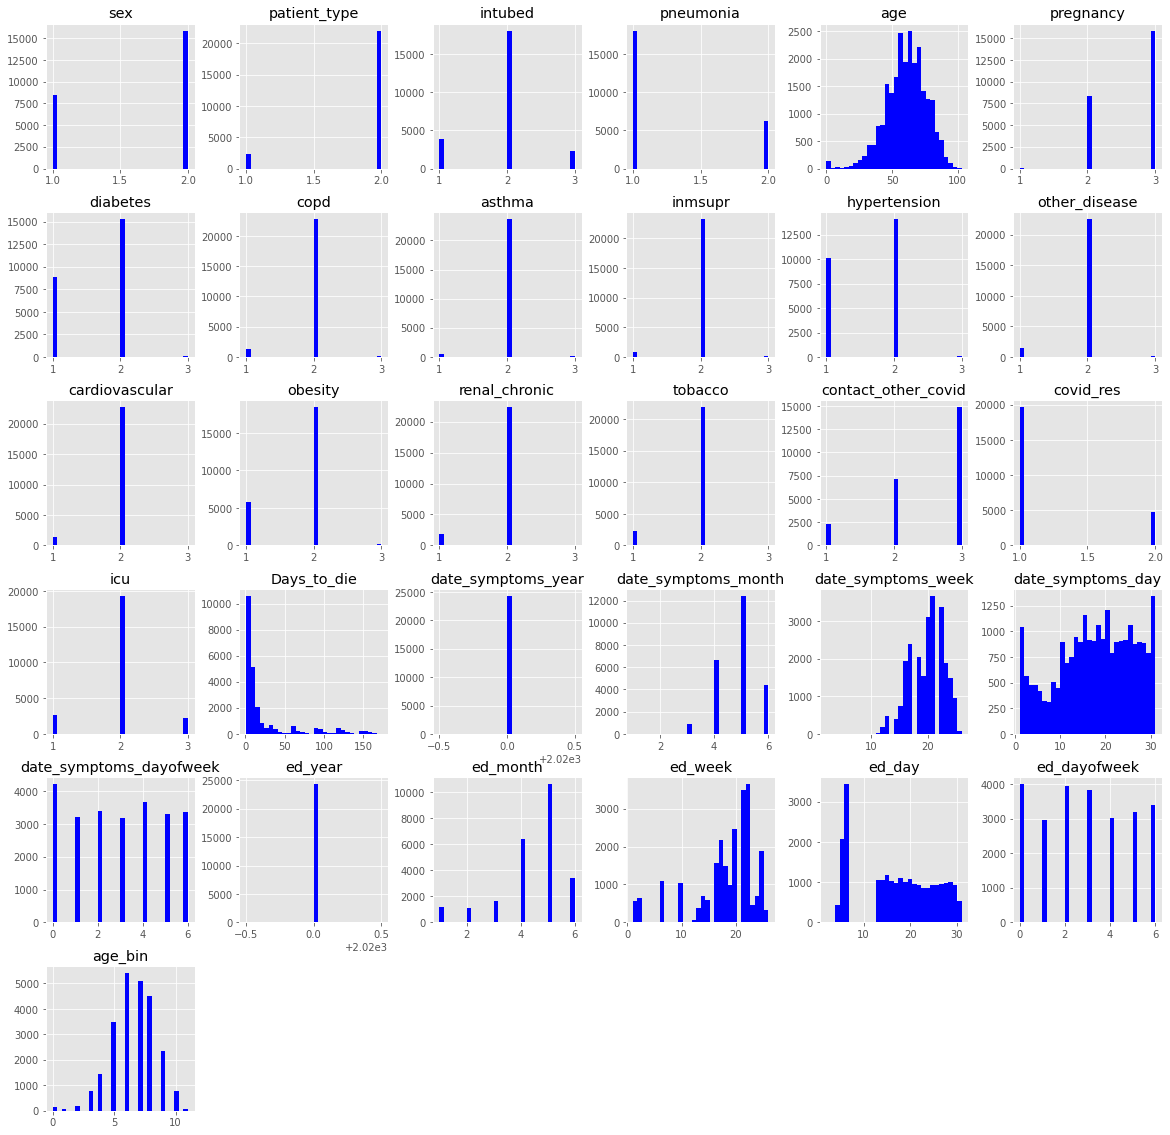

In [ ]:
df_reg.hist(bins = 30, figsize =(20,20), color = 'b' )
plt.show()

In [ ]:
RFE is an expensive process, so we try to locate the highly correlated features and drop them since they provide the same information 
correlated_features_1 = set()
survival is removed since its the class label 
correlation_matrix_1 = df_reg.drop('Days_to_die', axis=1).corr()

for i in range(len(correlation_matrix_1.columns)):
   for j in range(i):
       if abs(correlation_matrix_1.iloc[i, j]) > 0.8:
            colname_1 = correlation_matrix_1.columns[i]
            correlated_features_1.add(colname_1)

In [ ]:
correlated_features_1

In [ ]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24315 entries, 4 to 499613
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       24315 non-null  object        
 1   sex                      24315 non-null  int64         
 2   patient_type             24315 non-null  int64         
 3   date_symptoms            24315 non-null  datetime64[ns]
 4   intubed                  24315 non-null  int64         
 5   pneumonia                24315 non-null  int64         
 6   age                      24315 non-null  int64         
 7   pregnancy                24315 non-null  int64         
 8   diabetes                 24315 non-null  int64         
 9   copd                     24315 non-null  int64         
 10  asthma                   24315 non-null  int64         
 11  inmsupr                  24315 non-null  int64         
 12  hypertension             24315 

In [ ]:
df_reg.describe()

,sex,patient_type,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,Days_to_die,date_symptoms_year,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek,ed_year,ed_month,ed_week,ed_day,ed_dayofweek,age_bin
count,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000,24315.0,24315.000000,24315.000000,24315.000000,24315.000000,24315.0,24315.000000,24315.000000,24315.000000,24315.000000,24315.000000
mean,1.653588,1.907547,1.933416,1.256385,60.730043,2.653300,1.641291,1.950113,1.985153,1.969648,1.590253,1.946617,1.946165,1.769319,1.928768,1.912194,2.514703,1.192926,1.982398,24.440058,2020.0,4.836480,19.800288,17.274645,2.912688,2020.0,4.406539,17.987950,17.604565,2.906190,6.573432
std,0.475836,0.289671,0.499782,0.436646,15.218072,0.478428,0.491239,0.243403,0.161433,0.205181,0.502633,0.260560,0.252366,0.435958,0.279736,0.304171,0.664543,0.394604,0.452683,38.089900,0.0,0.756422,3.012410,8.373082,2.037080,0.0,1.233668,5.877186,8.340602,2.004899,1.783776
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2020.0,1.000000,2.000000,1.000000,0.000000,2020.0,1.000000,1.000000,2.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,1.000000,51.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,3.000000,2020.0,4.000000,17.000000,11.000000,1.000000,2020.0,4.000000,16.000000,13.000000,1.000000,5.000000
50%,2.000000,2.000000,2.000000,1.000000,61.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,8.000000,2020.0,5.000000,20.000000,18.000000,3.000000,2020.0,5.000000,20.000000,18.000000,3.000000,7.000000
75%,2.000000,2.000000,2.000000,2.000000,71.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,1.000000,2.000000,20.000000,2020.0,5.000000,22.000000,24.000000,5.000000,2020.0,5.000000,22.000000,25.000000,5.000000,8.000000
max,2.000000,2.000000,3.000000,2.000000,103.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,2.000000,3.000000,173.000000,2020.0,6.000000,26.000000,31.000000,6.000000,2020.0,6.000000,26.000000,31.000000,6.000000,11.000000


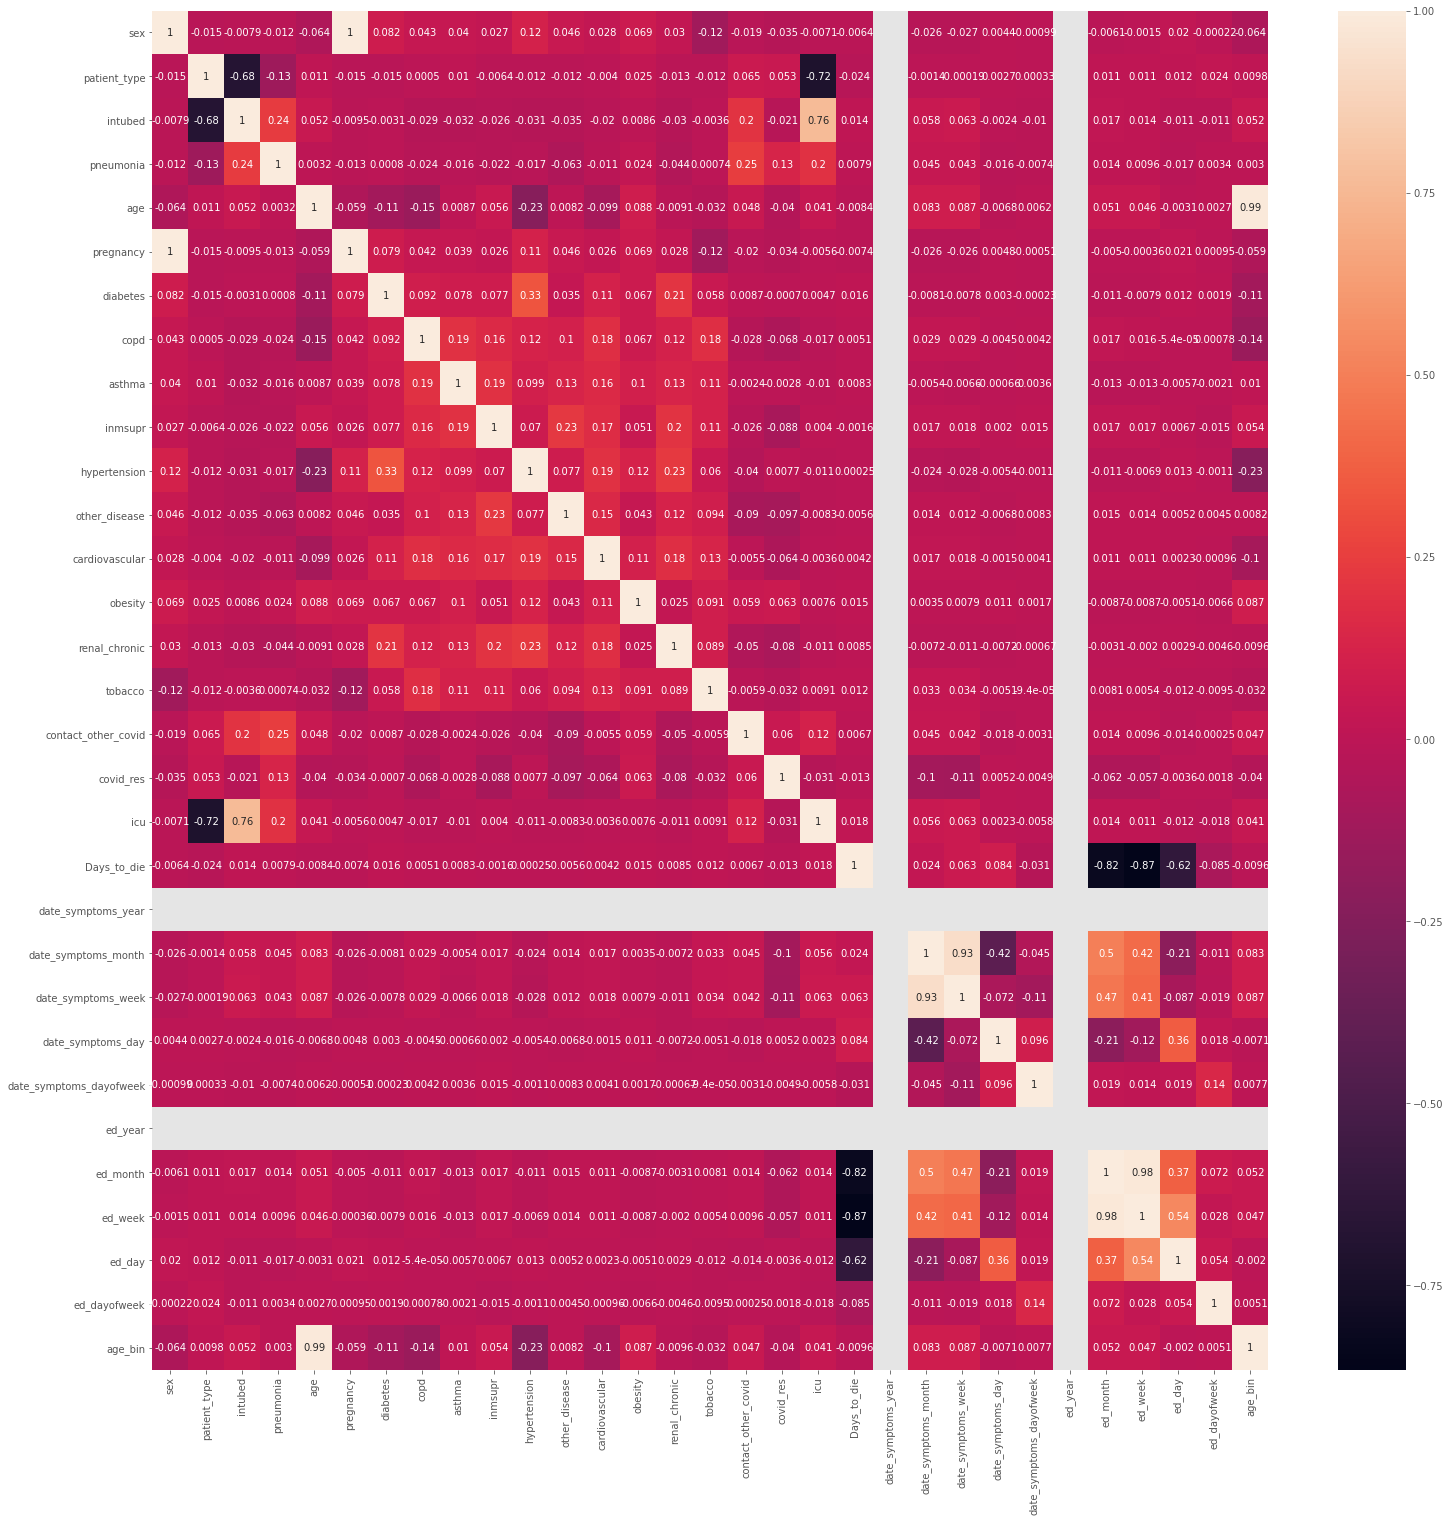

In [ ]:
#Provide a plot to show correlation matrix between attributes in the dataset 
cor_cov1 = df_reg.corr()
f, ax = plt.subplots(figsize =(25,25))
sns.heatmap(cor_cov1, annot = True)

In [ ]:
df_reg.dtypes
df_reg.shape

(24315, 34)

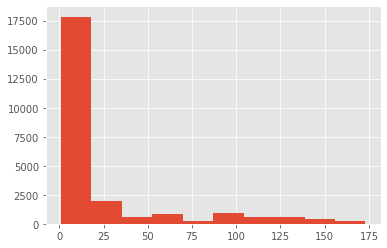

In [ ]:
df_reg["Days_to_die"].hist()

In [ ]:
X, y = df_reg.drop(['date_symptoms','id','ed','Days_to_die','age'], axis=1), df_reg['Days_to_die']
df_reg[df_reg['Days_to_die'] == 0].head()

,id,sex,patient_type,date_symptoms,intubed,pneumonia,age,pregnancy,diabetes,copd,asthma,inmsupr,hypertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,contact_other_covid,covid_res,icu,ed,Days_to_die,date_symptoms_year,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek,ed_year,ed_month,ed_week,ed_day,ed_dayofweek,age_bin


In [ ]:
X.dtypes

sex                        int64
patient_type               int64
intubed                    int64
pneumonia                  int64
pregnancy                  int64
diabetes                   int64
copd                       int64
asthma                     int64
inmsupr                    int64
hypertension               int64
other_disease              int64
cardiovascular             int64
obesity                    int64
renal_chronic              int64
tobacco                    int64
contact_other_covid        int64
covid_res                  int64
icu                        int64
date_symptoms_year         int64
date_symptoms_month        int64
date_symptoms_week         int64
date_symptoms_day          int64
date_symptoms_dayofweek    int64
ed_year                    int64
ed_month                   int64
ed_week                    int64
ed_day                     int64
ed_dayofweek               int64
age_bin                    int64
dtype: object

In [ ]:
df_r = pd.DataFrame(X, columns = ['sex', 'patient_type', 'intubed', 'pneumonia', 'age_bin', 'pregnancy','diabetes', 'copd', 'asthma', 'inmsupr',
               'hypertension', 'other_disease', 'cardiovascular', 'obesity', 'renal_chronic', 'tobacco', 'contact_other_covid',
               'covid_res', 'icu','date_symptoms_year', 'date_symptoms_month','date_symptoms_week', 'date_symptoms_day', 'date_symptoms_dayofweek',
               'ed_year', 'ed_month', 'ed_week', 'ed_dayofweek'
               ])

In [ ]:
#scale the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
X

array([[-1.37358607,  0.31917326,  0.13322966, ..., -0.55207765,
        -1.44957411, -0.32147755],
       [ 0.72802136,  0.31917326,  0.13322966, ..., -0.19238397,
         0.04679156, -0.88209769],
       [-1.37358607, -3.1330945 ,  2.13414333, ..., -0.31228186,
         0.54558011,  0.23914259],
       ...,
       [ 0.72802136,  0.31917326,  0.13322966, ...,  1.36628863,
        -0.451997  , -1.44271784],
       [ 0.72802136,  0.31917326,  0.13322966, ...,  1.60608441,
        -0.95078556,  1.36038288],
       [-1.37358607,  0.31917326, -1.86768401, ..., -1.63115868,
         1.04436867, -2.56395812]])

In [ ]:
# putting X_train into a dataframe for rfecv evaluation
X_df_reg = pd.DataFrame(X_train)
X_df_reg.head()

,age_bin,entry_date_year,entry_date_month,entry_date_week,entry_date_day,entry_date_dayofweek,date_symptoms_year,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek,sex_2,patient_type_2,intubed_2,intubed_3,pneumonia_2,pneumonia_3,pregnancy_2,pregnancy_3,diabetes_2,diabetes_3,copd_2,copd_3,asthma_2,asthma_3,inmsupr_2,inmsupr_3,hypertension_2,hypertension_3,other_disease_2,other_disease_3,cardiovascular_2,cardiovascular_3,obesity_2,obesity_3,renal_chronic_2,renal_chronic_3,tobacco_2,tobacco_3,contact_other_covid_2,contact_other_covid_3,covid_res_2,icu_2,icu_3
312038,-1.016083,0.0,-0.297145,-0.138195,1.591294,0.618300,0.0,-0.247170,-0.081380,1.510131,0.005963,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,-0.666427,0.889262,-0.495229,0.523307
177851,1.965230,0.0,1.351464,1.240962,-1.067684,1.648518,0.0,-0.647452,-0.749121,-0.995894,-1.443464,0.987068,1.909531,2.020458,-1.910912,-2.312390,-0.004692,-0.967693,0.981802,-2.609388,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,1.500538,-1.124529,2.019269,-1.910924
146975,-1.016083,0.0,-0.297145,-0.236706,0.550824,-0.411917,0.0,-0.247170,-0.176771,0.371029,-1.443464,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,1.500538,-1.124529,-0.495229,0.523307
480979,-2.208608,0.0,-1.121450,-0.926285,1.822509,-0.927026,0.0,-1.047734,-0.939904,1.054490,-0.960322,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,-0.651983,-0.666427,0.889262,-0.495229,0.523307
29475,-0.419820,0.0,0.115007,0.157339,0.550824,1.133409,0.0,0.153112,0.204795,0.257119,-0.477180,0.987068,-0.523689,-0.494937,0.523310,0.432453,-0.004692,-0.967693,0.981802,0.383232,-0.057401,0.140862,-0.053872,0.191384,-0.053797,0.140943,-0.057768,0.445753,-0.054669,0.190985,-0.066393,0.16297,-0.055036,0.447591,-0.054318,0.153446,-0.054429,0.312799,-0.056302,1.533783,-0.666427,-1.124529,-0.495229,0.523307


### RFECV for Feature engineerng 

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=42)
rfecv_1 = RFECV(estimator=rfc, step=1, cv=StratifiedKFold(5), scoring='accuracy')
rfecv_1.fit(X_1, y_1)

C:\Users\akinmade\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  % (min_groups, self.n_splits)), UserWarning)


RFECV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
      estimator=RandomForestClassifier(random_state=42), scoring='accuracy')

In [ ]:
#  Create a logistic regression estimator 
import sklearn.linear_model as lm
logreg = lm.LogisticRegression()
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()


# Use RFECV to pick best features, using Stratified Kfold
rfecv_1 =   RFECV(estimator=model, cv=StratifiedKFold(10), scoring='neg_mean_absolute_error')

# Fit the features to the response variable
rfecv_1.fit(X_1, y_1)


C:\Users\akinmade\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


RFECV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
      estimator=DecisionTreeRegressor(), scoring='neg_mean_absolute_error')

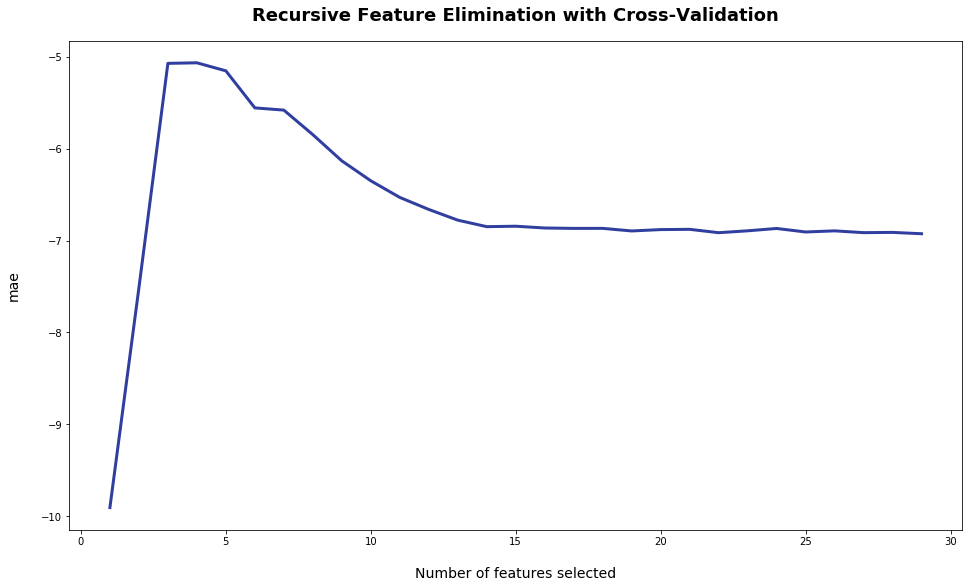

In [ ]:
plotting the rfecv chart for feature selection
plt.figure(figsize=(16, 9))
plt.title('Recursive Feature Elimination with Cross-Validation', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Number of features selected', fontsize=14, labelpad=20)
plt.ylabel('mae', fontsize=14, labelpad=20)
plt.plot(range(1, len(rfecv_1.grid_scores_) + 1), rfecv_1.grid_scores_, color='#303F9F', linewidth=3)
plt.show()

In [ ]:
optimal_features = X_1[:, rfecv_1.support_] # selector is a RFECV fitted object

# n = 15 # to select top 6 features
feature_ranks = rfecv_1.ranking_  # selector is a RFECV fitted object
feature_ranks_with_idx = enumerate(feature_ranks)
sorted_ranks_with_idx = sorted(feature_ranks_with_idx, key=lambda x: x[1])
top_n_idx = [idx for idx, rnk in sorted_ranks_with_idx[:n]]

top_n_features = X_1[:15, top_n_idx]
print(sorted_ranks_with_idx)

[(22, 1), (26, 1), (27, 1), (28, 1), (23, 2), (4, 3), (24, 4), (0, 5), (10, 6), (13, 7), (18, 8), (16, 9), (3, 10), (21, 11), (6, 12), (17, 13), (5, 14), (2, 15), (15, 16), (11, 17), (12, 18), (14, 19), (7, 20), (9, 21), (8, 22), (1, 23), (19, 24), (20, 25), (25, 26)]


In [ ]:
df_r.drop(['covid_res', 'pregnancy', 'intubed','tobacco', 'other_disease', 'cardiovascular','renal_chronic', 'copd', 'asthma', 'inmsupr', 'patient_type', 'date_symptoms_year' ], axis = 1, inplace = True)


In [ ]:
df_r.dtypes

sex                        int64
pneumonia                  int64
age_bin                    int64
diabetes                   int64
hypertension               int64
obesity                    int64
contact_other_covid        int64
icu                        int64
date_symptoms_month        int64
date_symptoms_week         int64
date_symptoms_day          int64
date_symptoms_dayofweek    int64
ed_year                    int64
ed_month                   int64
ed_week                    int64
ed_dayofweek               int64
dtype: object

In [ ]:
df_r.columns

Index(['sex', 'pneumonia', 'age_bin', 'diabetes', 'hypertension', 'obesity',
       'contact_other_covid', 'icu', 'date_symptoms_month',
       'date_symptoms_week', 'date_symptoms_day', 'date_symptoms_dayofweek',
       'ed_year', 'ed_month', 'ed_week', 'ed_dayofweek'],
      dtype='object')

In [ ]:
 # splitting the dataset before applying smote oversampling
X_train, X_test, y_train, y_test = train_test_split(df_r, y, test_size=0.2, random_state=42)
X_train.shape
print(y_test)

16451       7.0
31261       9.0
405302    119.0
132307      2.0
38476       3.0
          ...  
88915      18.0
189567     35.0
198891      8.0
63793       7.0
114975     25.0
Name: Days_to_die, Length: 4863, dtype: float64


In [ ]:
X_train

,sex,pneumonia,age_bin,diabetes,hypertension,obesity,contact_other_covid,icu,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek,ed_year,ed_month,ed_week,ed_dayofweek
45679,2,2,8,1,2,2,3,2,6,24,14,6,2020,6,25,0
113228,2,2,5,3,2,2,2,2,4,18,27,0,2020,4,18,1
114729,2,2,5,2,2,2,3,2,6,24,13,5,2020,6,25,0
38543,2,1,4,1,2,2,3,2,5,21,22,4,2020,5,22,6
12976,2,1,6,2,2,2,3,2,5,20,14,3,2020,5,20,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335042,2,2,7,2,2,2,3,2,5,19,5,1,2020,5,19,1
60877,1,1,5,2,2,2,1,1,5,21,20,2,2020,5,22,3
9659,1,1,9,2,2,2,2,2,5,21,24,6,2020,5,22,1
177599,2,2,6,2,1,1,3,2,4,16,13,0,2020,4,16,0


In [ ]:
X_test

,sex,pneumonia,age_bin,diabetes,hypertension,obesity,contact_other_covid,icu,date_symptoms_month,date_symptoms_week,date_symptoms_day,date_symptoms_dayofweek,ed_year,ed_month,ed_week,ed_dayofweek
16451,2,1,5,1,1,2,3,2,3,12,22,6,2020,3,13,0
31261,2,1,10,2,2,2,3,2,6,24,11,3,2020,6,25,0
405302,1,1,2,2,2,2,3,2,3,13,27,4,2020,1,1,5
132307,2,1,7,1,2,2,2,1,5,22,27,2,2020,5,22,3
38476,2,1,7,2,1,2,3,2,5,19,8,4,2020,5,20,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88915,1,2,8,1,1,2,3,2,4,17,21,1,2020,4,17,1
189567,2,2,6,2,2,2,3,2,6,23,2,1,2020,5,19,2
198891,2,1,6,1,2,2,2,2,5,19,10,6,2020,5,20,3
63793,2,1,7,2,2,2,2,1,5,22,26,1,2020,5,22,5


In [ ]:
y_train

45679      2.0
113228     2.0
114729     1.0
38543      6.0
12976      2.0
          ... 
335042     8.0
60877     23.0
9659       3.0
177599     7.0
458877     1.0
Name: Days_to_die, Length: 19452, dtype: float64

In [ ]:
y_test

16451       7.0
31261       9.0
405302    119.0
132307      2.0
38476       3.0
          ...  
88915      18.0
189567     35.0
198891      8.0
63793       7.0
114975     25.0
Name: Days_to_die, Length: 4863, dtype: float64

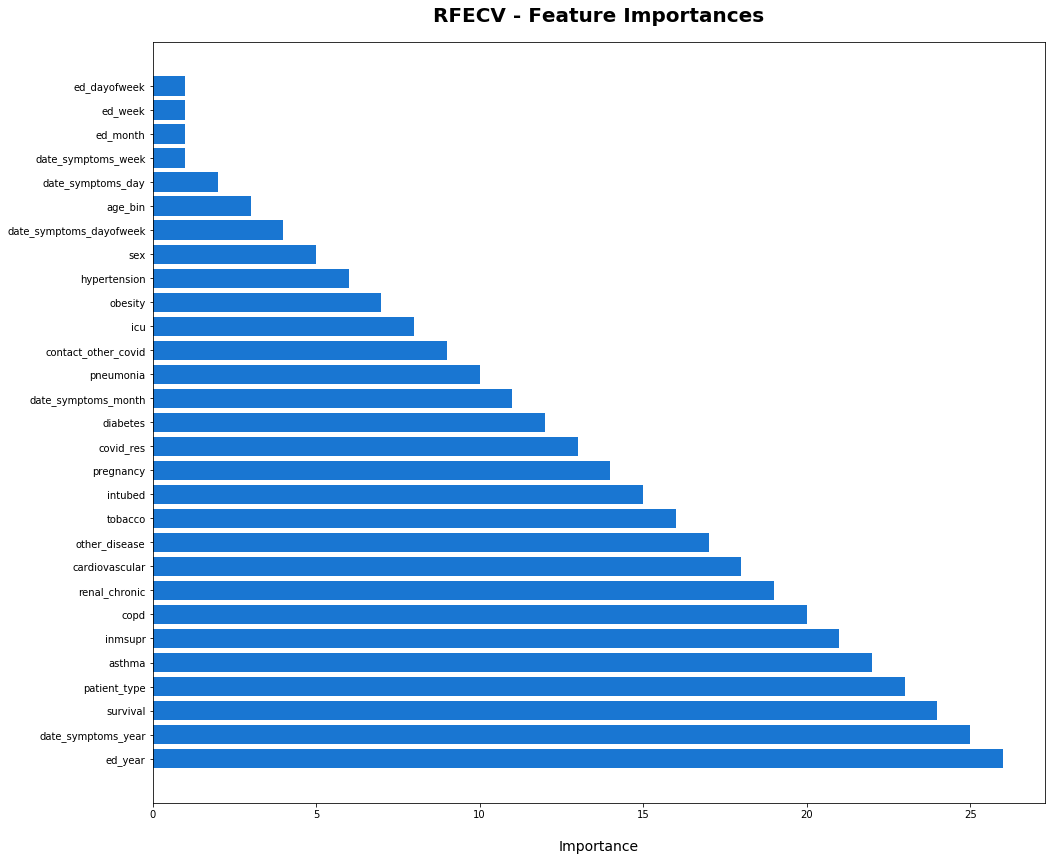

In [ ]:
#plotting a bargraph of each selected feature according to their importance
dset = pd.DataFrame()
dset['attr'] = df_r.columns
dset['importance'] = rfecv.estimator_.feature_importances_
dset['importance'] = feature_ranks

dset = dset.sort_values(by='importance', ascending=False)
plt.figure(figsize=(16, 14))
plt.barh(y=dset['attr'], width=dset['importance'], color='#1976D2')
plt.title('RFECV - Feature Importances', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

# Modelling (Regression)

In [ ]:
from sklearn.linear_model import Lasso, Ridge, SGDRegressor

### Lasso

In [ ]:
lasso_reg = Lasso()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}
lasso_GS = GridSearchCV(lasso_reg, param_grid=params_Ridge, scoring='neg_mean_absolute_error')
lasso_GS.fit(X_train,y_train)
lasso_GS.best_params_
lasso_GS.score(X_test,y_test)

### Linear regression 

In [ ]:
#Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
lin_regression = LinearRegression()
lin_fit = lin_regression.fit(X_train, y_train)

y_pred_linear = lin_regression.predict(X_test)

linear_accuracy = lin_regression.score(df_r,y)
print(100*linear_accuracy,'%')

96.21871414413339 %


In [ ]:
import sklearn.metrics as sm
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, y_pred_linear), 2))

Mean absolute error(MAE) = 5.55


### Ridge

In [ ]:
ridge_reg = Ridge()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}

Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, scoring='neg_mean_absolute_error')
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_
#*{'alpha': 1, 'fit_intercept': True}*

Ridge_GS.score(X_test,y_test)

-5.550523960308589

In [ ]:
ridge_reg = Ridge()
from sklearn.model_selection import GridSearchCV
params_Ridge = {'alpha': [1,0.1,0.01,0.001,0.0001,0] , "fit_intercept": [True, False]}

Ridge_GS = GridSearchCV(ridge_reg, param_grid=params_Ridge, scoring='neg_mean_absolute_error')
Ridge_GS.fit(X_train,y_train)
Ridge_GS.best_params_
#*{'alpha': 1, 'fit_intercept': True}*

Ridge_GS.score(X_test,y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=2.9238e-17): result may not be accurate.
  overwrite_a=True).T


-5.470674201217576

### Random Forest Regressor

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = { "n_estimators": [10,20,30], "max_features" : ["auto", "sqrt", "log2"], "min_samples_split" : [2,4,8], "bootstrap": [True, False],}
RF_grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')
RF_grid.fit(X_train, y_train)
#RF_grid.best_score
#RF_grid.best_params_
RF_grid.score(X_test, y_test)

-5.101926616289039

In [ ]:
pickle.dump(RF_grid, open('model.pkl','wb'))


In [ ]:
model = pickle.load(open('model.pkl','rb'))


In [ ]:
#pickle the model
import pickle
pickl = {'model': RF_grid}
pickle.dump( pickl, open( 'model_file' + ".p","wb"))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestRegressor

estimator = RandomForestRegressor()
param_grid = { "n_estimators": [10,20,30], "max_features" : ["auto", "sqrt", "log2"], "min_samples_split" : [2,4,8], "bootstrap": [True, False],}
RF_grid = GridSearchCV(estimator, param_grid, n_jobs=-1, cv=5, scoring='neg_mean_absolute_error')
RF_grid.fit(X_train, y_train)
RF_grid.score(X_test, y_test)

-5.118230234659833

### Decision Tree Regressor

In [ ]:
#scoring = make_scorer(r2_score)
from sklearn.tree import DecisionTreeRegressor
dtrees = DecisionTreeRegressor ()
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring= 'neg_mean_absolute_error', cv=5, refit=True)

g_cv.fit(X_train, y_train)
#g_cv.best_params_

g_cv.score(X_test, y_test)
# print(result)


-6.126793099171261

### XGBoost

In [ ]:
#from sklearn.metrics import mean_absolute_percentage_error
import sklearn.metrics as sm
import xgboost
xgb = xgboost.XGBRegressor()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
print(sm.mean_absolute_error(y_test, xgb_pred))

[02:34:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
5.097483248811628


### The output from below is wrapped and utilized in the model productionization stage

In [ ]:
#pickle the model (info collected is used for model productionization)
import pickle
pickl = {'model': RF_grid}
pickle.dump( pickl, open( 'model_file' + ".p","wb"))

In [ ]:
list(X_test.iloc[1,:])

[2, 1, 10, 2, 2, 2, 99, 2, 6, 24, 11, 3, 2020, 6, 25, 0]

In [ ]:
X_train

In [ ]:
y_train

In [ ]:
list(y_test.iloc[:])

[7.0,
 9.0,
 119.0,
 2.0,
 3.0,
 3.0,
 2.0,
 22.0,
 5.0,
 1.0,
 67.0,
 4.0,
 117.0,
 123.0,
 12.0,
 1.0,
 2.0,
 7.0,
 5.0,
 2.0,
 20.0,
 9.0,
 90.0,
 3.0,
 154.0,
 11.0,
 2.0,
 3.0,
 125.0,
 2.0,
 6.0,
 18.0,
 7.0,
 10.0,
 34.0,
 2.0,
 69.0,
 63.0,
 125.0,
 2.0,
 3.0,
 2.0,
 70.0,
 96.0,
 11.0,
 153.0,
 14.0,
 7.0,
 8.0,
 6.0,
 37.0,
 1.0,
 88.0,
 20.0,
 38.0,
 5.0,
 9.0,
 7.0,
 16.0,
 2.0,
 3.0,
 6.0,
 8.0,
 3.0,
 59.0,
 20.0,
 18.0,
 1.0,
 152.0,
 148.0,
 5.0,
 118.0,
 1.0,
 6.0,
 14.0,
 7.0,
 14.0,
 2.0,
 1.0,
 34.0,
 2.0,
 3.0,
 20.0,
 2.0,
 3.0,
 8.0,
 9.0,
 6.0,
 1.0,
 3.0,
 2.0,
 2.0,
 30.0,
 12.0,
 4.0,
 3.0,
 6.0,
 6.0,
 32.0,
 33.0,
 7.0,
 89.0,
 5.0,
 93.0,
 88.0,
 31.0,
 2.0,
 154.0,
 4.0,
 7.0,
 6.0,
 1.0,
 119.0,
 7.0,
 10.0,
 5.0,
 95.0,
 2.0,
 22.0,
 8.0,
 134.0,
 47.0,
 122.0,
 3.0,
 71.0,
 20.0,
 12.0,
 25.0,
 147.0,
 9.0,
 6.0,
 65.0,
 17.0,
 1.0,
 4.0,
 4.0,
 7.0,
 6.0,
 6.0,
 15.0,
 2.0,
 129.0,
 1.0,
 7.0,
 4.0,
 3.0,
 7.0,
 6.0,
 5.0,
 22.0,
 3.0,
 3.0,
 155.0,
 

### Neural network

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
dmodel = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=[16]),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='tanh'),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
  
    layers.Dense(32, activation='relu'),
    layers.Dropout(rate=0.2),
    layers.BatchNormalization(),
    layers.Dense(1, activation='relu'),
])

dmodel.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['mean_absolute_error'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)
history_rnn = dmodel.fit(X_train, y_train, epochs=10, callbacks=[early_stopping],
    verbose=0, batch_size=512, validation_split=0.2)

In [ ]:
# predict crisp classes for test set
s = dmodel.predict_classes(X_test, verbose=0)
import sklearn.metrics as sm
print("Mean absolute error(MAE) =", round(sm.mean_absolute_error(y_test, s), 2))


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Mean absolute error(MAE) = 6.52


###LSTM

In [ ]:
#reshape the test and train values
X_train2 = X_train.values.reshape(len(X_train), 1, X_train.shape[1])
X_test2 = X_test.values.reshape(len(X_test), 1, X_test.shape[1])
y_train2 = np.expand_dims(y_train, 1)
y_test2= np.expand_dims(y_test, 1)


In [ ]:
#len(X_train) give the same result
X_train2.shape[0]

19452

In [ ]:
X_train2.shape

(19452, 1, 16)

In [ ]:
X_test2.shape

(4863, 1, 16)

In [ ]:
y_train2.shape

(19452, 1)

In [ ]:
y_test2.shape

(4863, 1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import LSTM

reg_lstm_model = Sequential()
reg_lstm_model.add(LSTM(500, activation='relu', input_shape=(X_train2.shape[1:]), return_sequences=True))
reg_lstm_model.add(Dropout(0.2))
reg_lstm_model.add(LSTM(200,activation='relu', return_sequences=True))
reg_lstm_model.add(Dropout(0.2))

reg_lstm_model.add(Dense(1))
reg_lstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_absolute_error','accuracy'])

reg_lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 500)            1034000   
_________________________________________________________________
dropout (Dropout)            (None, 1, 500)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 1, 200)            560800    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 200)            0         
_________________________________________________________________
dense (Dense)                (None, 1, 1)              201       
Total params: 1,595,001
Trainable params: 1,595,001
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#reg_lstm_model.fit(X_train, y_train, epochs = 5, batch_size = 32)
reg_lstm_model.fit(X_train2, y_train2, epochs = 20, batch_size = 100)

Epoch 1/20
195/195 [==============================] - 11s 41ms/step - loss: 1072.2507 - mean_absolute_error: 22.0357 - accuracy: 0.0915
Epoch 2/20
195/195 [==============================] - 8s 40ms/step - loss: 239.0803 - mean_absolute_error: 10.1780 - accuracy: 0.0918
Epoch 3/20
195/195 [==============================] - 8s 41ms/step - loss: 173.9300 - mean_absolute_error: 8.8441 - accuracy: 0.0976
Epoch 4/20
195/195 [==============================] - 8s 40ms/step - loss: 130.1154 - mean_absolute_error: 7.7007 - accuracy: 0.0984
Epoch 5/20
195/195 [==============================] - 8s 41ms/step - loss: 127.9543 - mean_absolute_error: 7.7553 - accuracy: 0.0999
Epoch 6/20
195/195 [==============================] - 8s 41ms/step - loss: 108.9150 - mean_absolute_error: 7.1664 - accuracy: 0.0988
Epoch 7/20
195/195 [==============================] - 8s 41ms/step - loss: 96.7851 - mean_absolute_error: 6.8960 - accuracy: 0.0979
Epoch 8/20
195/195 [==============================] - 8s 41ms/step

In [ ]:
lstm_pred = reg_lstm_model.predict(X_test2, verbose=0)


In [ ]:
import sklearn.metrics as sm
print(sm.mean_absolute_error(np.squeeze(lstm_pred, 1), y_test2))


5.927949510727697


In [ ]:
from sklearn.metrics import mean_absolute_error